In [1]:
# %%
import numpy as np
import sys
import os
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:

# –î–æ–±–∞–≤–ª—è–µ–º –ø—É—Ç—å –∫ –Ω–∞—à–µ–π –ø–µ—Å–æ—á–Ω–∏—Ü–µ –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
current_dir = os.getcwd()  # –ø—É—Ç—å –∫ notebooks
optimization_path = r"src"
if optimization_path not in sys.path:
    sys.path.append(optimization_path)

In [3]:
from src.spore_tree_config import SporeTreeConfig
from src.spore_tree import SporeTree
from src.pendulum import PendulumSystem
from src.visualize_spore_tree import visualize_spore_tree
from src.tree_evaluator import TreeEvaluator

In [4]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.1,
    max_control=2.0
)

init_position = np.array([np.pi/2, 0])

cfg = SporeTreeConfig(
    initial_position=np.array([np.pi/2, 0.0]),
    dt_base=0.1,
    dt_grandchildren_factor=0.1,
    figure_size=(10, 10)
)
cfg.validate()

True

In [5]:
def take_time_sign(grandchild):
    """
    –ò–∑–≤–ª–µ–∫–∞–µ—Ç —Å–ª–æ–≤–æ –ø–æ—Å–ª–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø–æ–¥—á–µ—Ä–∫–∏–≤–∞–Ω–∏—è –∏–∑ –ø–æ–ª—è 'name' –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞.
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫ —ç—Ç–∏—Ö —Å–ª–æ–≤.
    """
    
    name = grandchild['name']
    match = re.search(r'_([^_]+)$', name)
    if match.group(1) == 'forward':
        return 1
    elif match.group(1) == 'backward':
        return -1
    else:
        raise ValueError(f"–ù–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π –∑–Ω–∞–∫ –≤—Ä–µ–º–µ–Ω–∏: {match}")

# take_time_sign(grandchildren[1])

# %%

In [6]:
def draw_quad(state, time_sign,control, control_dot=0, N = 10, max_dt=0.1):
    quad_poses = [state]

    time = np.linspace(0, max_dt, N+1)
    for i in range(1,N+1):
        quad_poses.append(pendulum.quad_step(quad_poses[-1], control, 0, time_sign*time[i]))
        
    return np.array(quad_poses)

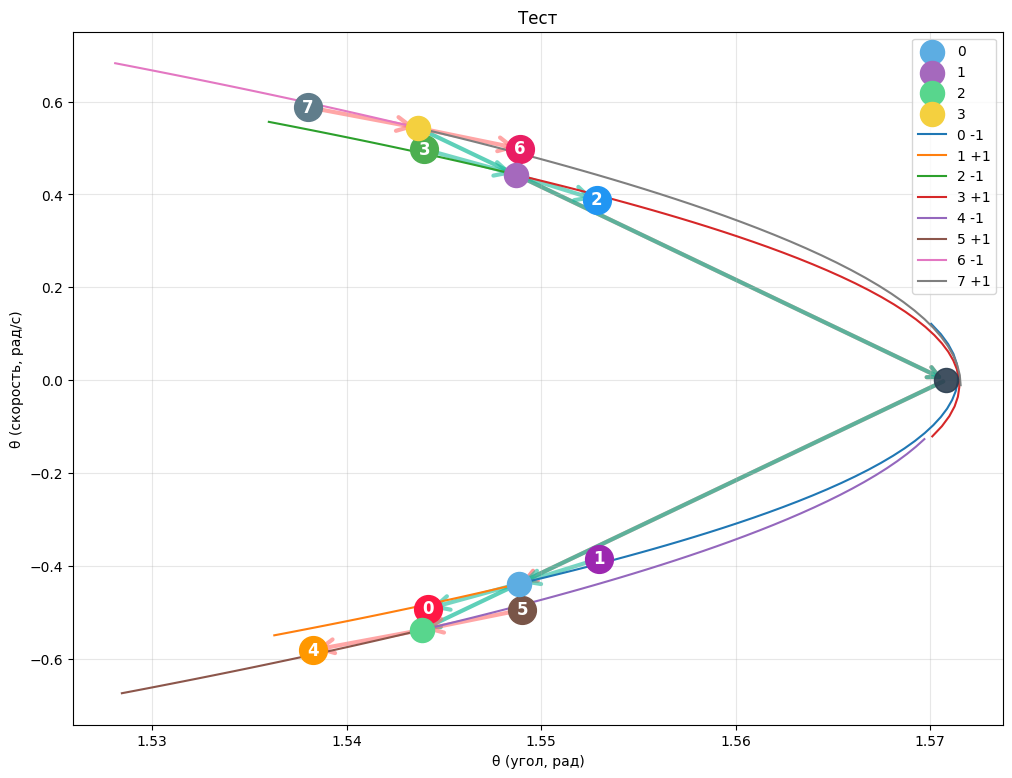

In [7]:
tree = SporeTree(pendulum, cfg)
children = tree.create_children(show=False)
grandchildren = tree.create_grandchildren(show=False)
tree.sort_and_pair_grandchildren()
tree.calculate_mean_points()

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. –ö—ç—à-–æ—Ü–µ–Ω—â–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
visualize_spore_tree(tree, "–¢–µ—Å—Ç")






dts = [0.005, 0.001, 0.001, 0.005, 0.003, 0.001, 0.001, 0.004]
for i in range(len(children)):
    poses_1 = draw_quad(state=children[i]['position'], time_sign=-1, control=children[i]['control'], N=50, max_dt=dts[2*i])
    poses_2 = draw_quad(state=children[i]['position'], time_sign=+1, control=children[i]['control'], N=50, max_dt=dts[2*i+1])
    plt.plot(poses_1[:, 0], poses_1[:, 1], label=f'{2*i} -1')
    plt.plot(poses_2[:, 0], poses_2[:, 1], label=f'{2*i+1} +1')
plt.legend()


In [166]:
def draw_rk(pendulum, state, time_sign, control, N = 50, total_dt=0.01):
    poses = [state]

    for i in range(1, N+1):
        poses.append(pendulum.step(poses[-1], control, time_sign*total_dt/N*i))

    return np.array(poses)

In [167]:
init_position = np.array([np.pi/2 * 0, 1*0])

cfg = SporeTreeConfig(
    initial_position=init_position,
    dt_base=0.1,
    dt_grandchildren_factor=0.2,
    figure_size=(10, 10)
)
cfg.validate()

True

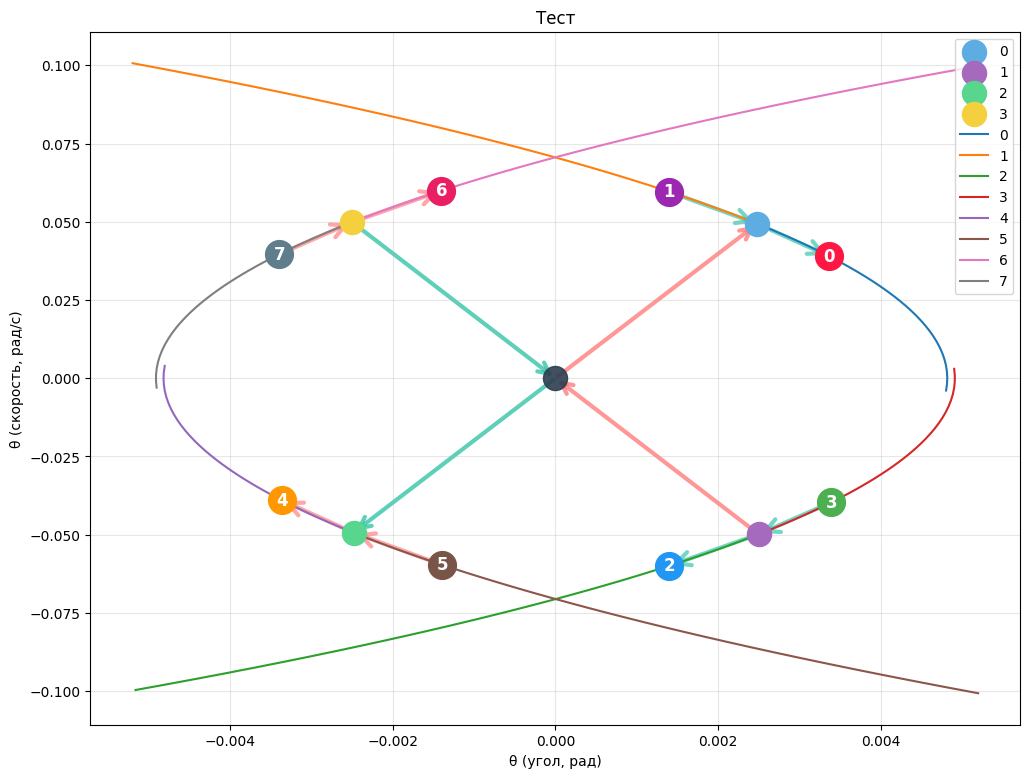

In [175]:
tree = SporeTree(pendulum, cfg)
children = tree.create_children(show=False)
grandchildren = tree.create_grandchildren(show=False)
tree.sort_and_pair_grandchildren()
tree.calculate_mean_points()

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 2. –ö—ç—à-–æ—Ü–µ–Ω—â–∏–∫ –Ω–∞ –æ—Å–Ω–æ–≤–µ –¥–µ—Ä–µ–≤–∞
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
visualize_spore_tree(tree, "–¢–µ—Å—Ç")


poses = []
# dts = [0.01, 0.005, 0.003, 0.003, 0.01, 0.006, 0.003, 0.003]
dts = np.ones(8) * 0.004

for i in range(len(grandchildren)):
    parent_pos = children[grandchildren[i]['parent_idx']]['position']
    sign = grandchildren[i]['dt'] / grandchildren[i]['dt_abs']
    control = grandchildren[i]['control']
    poses_1 = draw_rk(pendulum, state=parent_pos, time_sign=sign, control=control, total_dt=dts[i])
    if dts[i] > 0:
        plt.plot(poses_1[:, 0], poses_1[:, 1], label=f'{i}')

plt.legend()


In [109]:
grandchildren[1]

{'position': array([1.63622608, 0.66137763]),
 'id': 'grandchild_0_1',
 'name': 'gc_0_1_backward',
 'parent_idx': 0,
 'local_idx': 1,
 'global_idx': 1,
 'control': -2.0,
 'dt': -0.020000000000000004,
 'dt_abs': 0.020000000000000004,
 'color': '#FF6B6B',
 'size': 40}

0

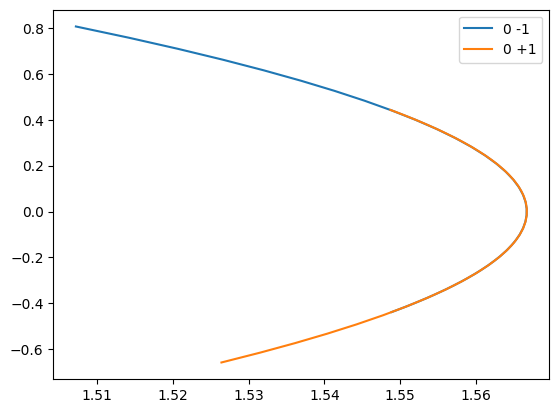

In [ ]:
plt.plot(poses[0][:, 0], poses[0][:, 1], label='0 -1')
plt.plot(poses[1][:, 0], poses[1][:, 1], label='0 +1')
plt.legend()

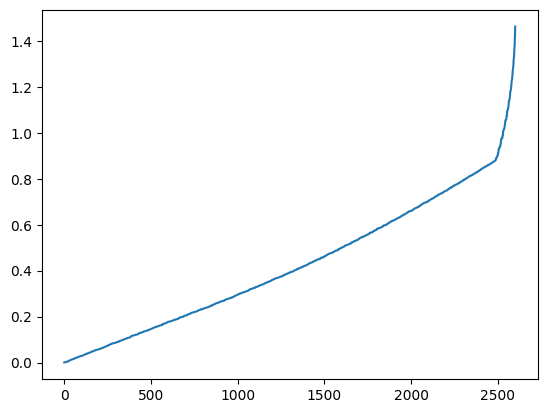

In [ ]:
p_1 = poses[0]
p_2 = poses[1]

dists = []
for i in range(len(p_1)):
    for j in range(len(p_2)):
        dist = np.linalg.norm(p_1[i] - p_2[j])
        dists.append(dist)
    
dists = np.sort(np.array(dists))

plt.plot(dists)

In [ ]:
dists[:10]

array([0.00013627, 0.00034914, 0.00084014, 0.00116462, 0.00131432,
       0.00131971, 0.00143423, 0.00161392, 0.00206813, 0.00213116])

In [ ]:
      gc_0  gc_1  gc_2  gc_3  gc_4  gc_5  gc_6  gc_7
gc_0     0     1    -1     1    -1     1     1     1
gc_1     1     0    -1     1     1     1    -1    -1
gc_2    -1    -1     0     1    -1    -1     1     1
gc_3     1     1     1     0     1     1     1    -1
gc_4    -1     1    -1     1     0     1    -1     1
gc_5     1     1    -1     1     1     0    -1     1
gc_6     1    -1     1     1    -1    -1     0     1
gc_7     1    -1     1    -1     1     1     1     0
gc_0 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_0 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_5 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_3 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_4 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_5 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!

In [ ]:
def compute_phase_acceleration_table(grandchildren, pendulum, show=False):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ –≤–Ω—É–∫–æ–≤ —á–µ—Ä–µ–∑ —Ç—Ä–µ—Ç—å—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é –º–∞—è—Ç–Ω–∏–∫–∞.
    
    –§–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ = [Œ∏Ãà, Œ∏‚Éõ] –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –º–µ–Ω—è–µ—Ç—Å—è —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è/—Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞–∫–æ–≤ –≤—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    signs_table = np.zeros((n, n), dtype=int)
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤
    phase_accelerations = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
        _, theta_ddot, theta_dddot = pendulum.get_all_derivatives(pos, control)
        
        # –§–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ = [Œ∏Ãà, Œ∏‚Éõ] —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        phase_accel = time_sign * np.array([theta_ddot, theta_dddot])
        phase_accelerations.append(phase_accel)
    
    # –¢–∞–∫–∂–µ –≤—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —Å–∫–æ—Ä–æ—Å—Ç–∏ –¥–ª—è –ø–æ–ª–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞
    phase_velocities = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        time_sign = 1 if (match and match.group(1) == 'forward') else -1
        
        _, theta_ddot, _ = pendulum.get_all_derivatives(pos, control)
        phase_vel = time_sign * np.array([pos[1], theta_ddot])
        phase_velocities.append(phase_vel)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                signs_table[i, j] = 0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏, —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ —É—Å–∫–æ—Ä–µ–Ω–∏—è
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                v1 = phase_velocities[i]
                v2 = phase_velocities[j]
                a1 = phase_accelerations[i]
                a2 = phase_accelerations[j]
                
                # –í–µ–∫—Ç–æ—Ä—ã —Ä–∞–∑–Ω–æ—Å—Ç–∏
                r_diff = r1 - r2
                v_diff = v1 - v2
                a_diff = a1 - a2
                
                # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
                distance = np.linalg.norm(r_diff)
                
                if distance < 1e-10:
                    signs_table[i, j] = 0
                else:
                    # –ü–µ—Ä–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    d_dist_dt = np.dot(r_diff, v_diff) / distance
                    
                    # –í—Ç–æ—Ä–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è (—á–µ—Ä–µ–∑ —É—Å–∫–æ—Ä–µ–Ω–∏–µ)
                    # d¬≤/dt¬≤|r‚ÇÅ-r‚ÇÇ| = [(r‚ÇÅ-r‚ÇÇ)¬∑(a‚ÇÅ-a‚ÇÇ) + |v‚ÇÅ-v‚ÇÇ|¬≤]/|r‚ÇÅ-r‚ÇÇ| - [(r‚ÇÅ-r‚ÇÇ)¬∑(v‚ÇÅ-v‚ÇÇ)]¬≤/|r‚ÇÅ-r‚ÇÇ|¬≥
                    
                    numerator = (np.dot(r_diff, a_diff) + 
                                np.dot(v_diff, v_diff) - 
                                (d_dist_dt**2))
                    
                    d2_dist_dt2 = numerator / distance
                    
                    # –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ –≤—Ç–æ—Ä–æ–π –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π
                    if d2_dist_dt2 < -1e-6:
                        signs_table[i, j] = -1  # –£—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ
                    elif d2_dist_dt2 > 1e-6:
                        signs_table[i, j] = 1   # –£—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ  
                    else:
                        signs_table[i, j] = 0   # –ü–æ—Å—Ç–æ—è–Ω–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(signs_table,
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üöÄ –¢–∞–±–ª–∏—Ü–∞ –∑–Ω–∞–∫–æ–≤ –í–¢–û–†–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π (—Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ):")
        print("   -1: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ ‚áá")
        print("    0: —Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–æ–µ –∏–∑–º–µ–Ω–µ–Ω–∏–µ ‚óè")
        print("   +1: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ ‚áâ")
        print()
        print(df)
    
    return df

In [ ]:
def compute_distance_table(grandchildren, show=False):
    """
    –°–æ—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–∞–±–ª–∏—Ü—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –º–µ–∂–¥—É –≤—Å–µ–º–∏ –ø–∞—Ä–∞–º–∏ –≤–Ω—É–∫–æ–≤ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position'
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –µ–≤–∫–ª–∏–¥–æ–≤—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π |r_i - r_j|
    """
    import numpy as np
    import pandas as pd
    
    n = len(grandchildren)
    distance_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                distance_table[i, j] = 0.0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏ –≤–Ω—É–∫–æ–≤ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ [theta, theta_dot]
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                
                # –ï–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ
                distance = np.linalg.norm(r1 - r2)
                distance_table[i, j] = distance
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(distance_table, 
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üìè –¢–∞–±–ª–∏—Ü–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π |r_i - r_j| –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ:")
        print("   –ï–≤–∫–ª–∏–¥–æ–≤–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –ø–æ–∑–∏—Ü–∏—è–º–∏ [Œ∏, Œ∏Ãá]")
        print()
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (–∏—Å–∫–ª—é—á–∞–µ–º –¥–∏–∞–≥–æ–Ω–∞–ª—å)
        upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
        distances = upper_triangle.stack().values
        
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π:")
        print(f"  –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.min():.6f}")
        print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.max():.6f}")
        print(f"  –°—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distances.mean():.6f}")
        print(f"  –ú–µ–¥–∏–∞–Ω–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {np.median(distances):.6f}")
        
        # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
        print(f"\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π:")
        bins = [0, 0.5, 1.0, 2.0, 5.0, float('inf')]
        labels = ['< 0.5', '0.5-1.0', '1.0-2.0', '2.0-5.0', '> 5.0']
        
        for i, (low, high) in enumerate(zip(bins[:-1], bins[1:])):
            count = ((distances >= low) & (distances < high)).sum()
            print(f"  {labels[i]:8s}: {count:2d} –ø–∞—Ä")
    
    return df

In [ ]:
# distances = compute_distance_table(grandchildren, show=True)
velocities = compute_distance_derivative_table(grandchildren, pendulum, show=True)  
# accelerations = compute_phase_acceleration_table(grandchildren, pendulum, show=True)


üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7556  -0.0803  10.8070 -1.0017 -3.4341  0.9051  9.8156
gc_1  10.7556   0.0000 -10.8088   0.0962  9.7550  1.0068 -9.8199 -0.8896
gc_2  -0.0803 -10.8088   0.0000  10.9319 -1.0840 -9.7978  0.9848  9.9493
gc_3  10.8070   0.0962  10.9319   0.0000  9.7975  1.1036 -1.8149 -0.9837
gc_4  -1.0017   9.7550  -1.0840   9.7975  0.0000  8.7649 -0.0988  8.8054
gc_5  -3.4341   1.0068  -9.7978   1.1036  8.7649  0.0000 -8.8081  0.1177
gc_6   0.9051  -9.8199   0.9848  -1.8149 -0.0988 -8.8081  0.0000  8.9808
gc_7   9.8156  -0.8896   9.9493  -0.9837  8.8054  0.1177  8.9808  0.0000

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
  –°–±–ª–∏–

In [122]:
def check_trajectory_safety_elegant(pendulum, tree, gc_idx, target_dt, alien_threshold=0.15, show=False):
    """
    –≠–ª–µ–≥–∞–Ω—Ç–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ —Å –ø–æ–º–æ—â—å—é scipy.optimize.
    –ù–∞—Ö–æ–¥–∏—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –¥–æ –∫–∞–∂–¥–æ–≥–æ —á—É–∂–æ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è.
    
    Args:
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        tree: –æ–±—ä–µ–∫—Ç –¥–µ—Ä–µ–≤–∞
        gc_idx: –∏–Ω–¥–µ–∫—Å –≤–Ω—É–∫–∞
        target_dt: —Ü–µ–ª–µ–≤–æ–π dt
        alien_threshold: –ø–æ—Ä–æ–≥ –±–ª–∏–∑–æ—Å—Ç–∏ –∫ —á—É–∂–æ–º—É —Ä–æ–¥–∏—Ç–µ–ª—é
        show: –∫—Ä–∞—Ç–∫–∏–π –¥–µ–±–∞–≥
        
    Returns:
        tuple: (is_safe, min_alien_distance, violating_parent_idx)
    """
    import numpy as np
    from scipy.optimize import minimize_scalar
    
    original_gc = tree.grandchildren[gc_idx]
    parent = tree.children[original_gc['parent_idx']]
    own_parent_idx = original_gc['parent_idx']
    
    # –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
    name = original_gc.get('name', '')
    time_sign = 1 if 'forward' in name else -1
    
    # –°–æ–∑–¥–∞–µ–º —Ñ—É–Ω–∫—Ü–∏—é —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –≤–Ω—É–∫–∞
    def grandchild_position(t):
        """–ü–æ–∑–∏—Ü–∏—è –≤–Ω—É–∫–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ t"""
        if t <= 0:
            return parent['position']
        dt_actual = time_sign * t
        return pendulum.step(parent['position'], original_gc['control'], dt_actual)
    
    # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ –∫–∞–∂–¥–æ–≥–æ —á—É–∂–æ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
    min_alien_distance = float('inf')
    violating_parent_idx = -1
    
    for p_idx, alien_parent in enumerate(tree.children):
        if p_idx == own_parent_idx:
            continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
        
        # –§—É–Ω–∫—Ü–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –æ—Ç —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –¥–æ —á—É–∂–æ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
        def distance_func(t):
            gc_pos = grandchild_position(t)
            return np.linalg.norm(gc_pos - alien_parent['position'])
        
        # –ò—â–µ–º –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –≤–¥–æ–ª—å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏
        try:
            result = minimize_scalar(
                distance_func,
                bounds=(0, abs(target_dt)),
                method='bounded'
            )
            
            if result.success:
                min_dist_to_this_parent = result.fun
                if min_dist_to_this_parent < min_alien_distance:
                    min_alien_distance = min_dist_to_this_parent
                    if min_dist_to_this_parent < alien_threshold:
                        violating_parent_idx = p_idx
        except:
            # –ü—Ä–∏ –æ—à–∏–±–∫–µ —Å—á–∏—Ç–∞–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –±–µ–∑–æ–ø–∞—Å–Ω—ã–º
            pass
    
    is_safe = min_alien_distance >= alien_threshold
    
    if show and not is_safe:
        print(f"      ‚ùå gc_{gc_idx}: –º–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ä–æ–¥–∏—Ç–µ–ª—è {violating_parent_idx} = {min_alien_distance:.3f} < {alien_threshold}")
    
    return is_safe, min_alien_distance, violating_parent_idx


def distance_function_elegant(dt_params, tree, pendulum, gc_i, gc_j, alien_threshold=0.15, show=False):
    """
    –≠–ª–µ–≥–∞–Ω—Ç–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è —Å –ø—Ä–æ–≤–µ—Ä–∫–æ–π —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π.
    """
    import numpy as np
    
    try:
        dt_i, dt_j = dt_params
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
        is_safe_i, min_dist_i, violating_i = check_trajectory_safety_elegant(
            pendulum, tree, gc_i, dt_i, alien_threshold, show=False
        )
        
        is_safe_j, min_dist_j, violating_j = check_trajectory_safety_elegant(
            pendulum, tree, gc_j, dt_j, alien_threshold, show=False
        )
        
        # –ï—Å–ª–∏ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –Ω–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã - –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –±–æ–ª—å—à–æ–π —à—Ç—Ä–∞—Ñ
        if not is_safe_i or not is_safe_j:
            if show:
                print(f"    üö´ –ù–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏: gc_{gc_i}={'unsafe' if not is_safe_i else 'safe'}, gc_{gc_j}={'unsafe' if not is_safe_j else 'safe'}")
            return 1e6
        
        # –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –ø–æ–∑–∏—Ü–∏–∏ –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
        original_gc_i = tree.grandchildren[gc_i]
        original_gc_j = tree.grandchildren[gc_j]
        
        parent_i = tree.children[original_gc_i['parent_idx']]
        parent_j = tree.children[original_gc_j['parent_idx']]
        
        # –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        time_sign_i = 1 if 'forward' in original_gc_i.get('name', '') else -1
        time_sign_j = 1 if 'forward' in original_gc_j.get('name', '') else -1
        
        pos_i = pendulum.step(parent_i['position'], original_gc_i['control'], time_sign_i * dt_i)
        pos_j = pendulum.step(parent_j['position'], original_gc_j['control'], time_sign_j * dt_j)
        
        distance = np.linalg.norm(pos_i - pos_j)
        
        if show:
            print(f"    ‚úÖ –ë–µ–∑–æ–ø–∞—Å–Ω—ã–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distance:.6f}")
        
        return distance
        
    except Exception as e:
        if show:
            print(f"    ‚ùå –û—à–∏–±–∫–∞: {e}")
        return 1e6


def find_best_partners_elegant(velocity_df, tree, pendulum, alien_threshold=0.15, show=False):
    """
    –≠–ª–µ–≥–∞–Ω—Ç–Ω—ã–π –ø–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤ —Å –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–º –¥–µ–±–∞–≥–æ–º.
    """
    import numpy as np
    import pandas as pd
    from scipy.optimize import minimize
    
    n = len(velocity_df)
    best_partners = {}
    
    if show:
        print(f"üîç –ü–æ–∏—Å–∫ –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤ (–ø–æ—Ä–æ–≥ –∫ —á—É–∂–∏–º —Ä–æ–¥–∏—Ç–µ–ª—è–º: {alien_threshold})")
    
    for gc_i in range(n):
        if show:
            print(f"\nüë§ gc_{gc_i}:")
        
        best_distance = float('inf')
        best_partner_info = None
        
        for gc_j in range(n):
            if gc_i == gc_j:
                continue
                
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è
            velocity = velocity_df.iloc[gc_i, gc_j]
            if velocity >= -1e-6:
                continue
            
            if show:
                print(f"  –ü–∞—Ä—Ç–Ω–µ—Ä gc_{gc_j} (—Å–∫–æ—Ä–æ—Å—Ç—å: {velocity:.3f})")
            
            # –û–±–µ—Ä—Ç–∫–∞ –¥–ª—è distance_function
            def objective_func(dt_params):
                return distance_function_elegant(
                    dt_params, tree, pendulum, gc_i, gc_j, alien_threshold, show=False
                )
            
            # –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
            min_dt = 0.001
            x0 = [min_dt, min_dt]
            bounds = [(0.0001, 0.1), (0.0001, 0.1)]
            
            try:
                result = minimize(
                    objective_func,
                    x0=x0,
                    bounds=bounds,
                    method='L-BFGS-B',
                    options={'ftol': 1e-9}
                )
                
                if result.success and result.fun < 1e5:  # –ò—Å–∫–ª—é—á–∞–µ–º —à—Ç—Ä–∞—Ñ—ã
                    if result.fun < best_distance:
                        optimal_dt_i, optimal_dt_j = result.x
                        
                        # –§–∏–Ω–∞–ª—å–Ω–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏
                        is_safe_i, _, _ = check_trajectory_safety_elegant(
                            pendulum, tree, gc_i, optimal_dt_i, alien_threshold, show=False
                        )
                        is_safe_j, _, _ = check_trajectory_safety_elegant(
                            pendulum, tree, gc_j, optimal_dt_j, alien_threshold, show=False
                        )
                        
                        is_safe = is_safe_i and is_safe_j
                        
                        best_distance = result.fun
                        best_partner_info = {
                            'partner': gc_j,
                            'initial_velocity': velocity,
                            'min_distance': best_distance,
                            'optimal_dt_self': optimal_dt_i,
                            'optimal_dt_partner': optimal_dt_j,
                            'dt_change_self': optimal_dt_i / min_dt,
                            'dt_change_partner': optimal_dt_j / min_dt,
                            'is_safe': is_safe,
                            'iterations': result.nit
                        }
                        
                        status = "‚úÖ" if is_safe else "‚ö†Ô∏è"
                        if show:
                            print(f"    {status} –õ—É—á—à–∏–π: {best_distance:.6f}, dt: {optimal_dt_i:.3f}, {optimal_dt_j:.3f}")
                elif show:
                    print(f"    ‚ùå –û—Ç–≤–µ—Ä–≥–Ω—É—Ç (–Ω–µ–±–µ–∑–æ–ø–∞—Å–Ω–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è)")
                    
            except Exception as e:
                if show:
                    print(f"    ‚ùå –û—à–∏–±–∫–∞: {e}")
        
        if best_partner_info:
            best_partners[gc_i] = best_partner_info
            partner = best_partner_info['partner']
            dist = best_partner_info['min_distance']
            is_safe = best_partner_info['is_safe']
            status = "‚úÖ" if is_safe else "‚ö†Ô∏è"
            if show:
                print(f"  {status} –õ—É—á—à–∏–π –ø–∞—Ä—Ç–Ω–µ—Ä: gc_{partner}, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {dist:.6f}")
        elif show:
            print(f"  üòû –ù–µ—Ç –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤")
    
    # –ö—Ä–∞—Ç–∫–∞—è —Å–≤–æ–¥–∫–∞
    if show:
        print(f"\nüìä –†–ï–ó–£–õ–¨–¢–ê–¢–´:")
        safe_pairs = sum(1 for info in best_partners.values() if info['is_safe'])
        total_pairs = len(best_partners)
        
        print(f"   –í—Å–µ–≥–æ –ø–∞—Ä: {total_pairs}")
        print(f"   –ë–µ–∑–æ–ø–∞—Å–Ω—ã—Ö: {safe_pairs}")
        print(f"   –ù–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã—Ö: {total_pairs - safe_pairs}")
        
        if best_partners:
            for gc_i, info in best_partners.items():
                partner = info['partner']
                dist = info['min_distance']
                status = "‚úÖ" if info['is_safe'] else "‚ö†Ô∏è"
                dt_self = info['dt_change_self']
                dt_partner = info['dt_change_partner']
                print(f"   {status} gc_{gc_i}‚Üígc_{partner}: {dist:.6f} (dt: x{dt_self:.1f}, x{dt_partner:.1f})")
            
            # –õ—É—á—à–∞—è –±–µ–∑–æ–ø–∞—Å–Ω–∞—è –ø–∞—Ä–∞
            safe_pairs_dict = {k: v for k, v in best_partners.items() if v['is_safe']}
            if safe_pairs_dict:
                best_safe = min(safe_pairs_dict.items(), key=lambda x: x[1]['min_distance'])
                gc_i, info = best_safe
                print(f"\nüèÜ –õ–£–ß–®–ê–Ø –ë–ï–ó–û–ü–ê–°–ù–ê–Ø –ü–ê–†–ê: gc_{gc_i} ‚Üî gc_{info['partner']}")
                print(f"   –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {info['min_distance']:.8f}")
                print(f"   dt: {info['optimal_dt_self']:.6f}, {info['optimal_dt_partner']:.6f}")
            else:
                print(f"\n‚ö†Ô∏è  –ù–ï–¢ –ë–ï–ó–û–ü–ê–°–ù–´–• –ü–ê–† (–ø–æ–ø—Ä–æ–±—É–π—Ç–µ —É–≤–µ–ª–∏—á–∏—Ç—å –ø–æ—Ä–æ–≥)")
    
    return best_partners

In [123]:
# %%
# –≠–ª–µ–≥–∞–Ω—Ç–Ω—ã–π —Ç–µ—Å—Ç —Ñ–∏–ª—å—Ç—Ä–∞ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–π
print("üéØ –≠–õ–ï–ì–ê–ù–¢–ù–´–ô –§–ò–õ–¨–¢–† –¢–†–ê–ï–ö–¢–û–†–ò–ô")
print("=" * 50)

# –ù–ê–°–¢–†–û–ô–ö–ò
alien_threshold = 0.001  # ‚Üê –ó–ê–î–ê–ô–¢–ï –ü–û–†–û–ì

print(f"‚öôÔ∏è  –ü–æ—Ä–æ–≥ –±–ª–∏–∑–æ—Å—Ç–∏ –∫ —á—É–∂–æ–º—É —Ä–æ–¥–∏—Ç–µ–ª—é: {alien_threshold}")

# –í—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è
velocity_df = compute_distance_derivative_table(tree.grandchildren, pendulum, show=False)

print(f"üìä –ù–∞–π–¥–µ–Ω–æ {len(velocity_df)} –≤–Ω—É–∫–æ–≤")

# –ü–æ–∏—Å–∫ –ª—É—á—à–∏—Ö –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤
best_partners = find_best_partners_elegant(
    velocity_df=velocity_df, 
    tree=tree, 
    pendulum=pendulum,
    alien_threshold=alien_threshold,
    show=True
)

üéØ –≠–õ–ï–ì–ê–ù–¢–ù–´–ô –§–ò–õ–¨–¢–† –¢–†–ê–ï–ö–¢–û–†–ò–ô
‚öôÔ∏è  –ü–æ—Ä–æ–≥ –±–ª–∏–∑–æ—Å—Ç–∏ –∫ —á—É–∂–æ–º—É —Ä–æ–¥–∏—Ç–µ–ª—é: 0.001
üìä –ù–∞–π–¥–µ–Ω–æ 8 –≤–Ω—É–∫–æ–≤
üîç –ü–æ–∏—Å–∫ –ø–∞—Ä—Ç–Ω–µ—Ä–æ–≤ (–ø–æ—Ä–æ–≥ –∫ —á—É–∂–∏–º —Ä–æ–¥–∏—Ç–µ–ª—è–º: 0.001)

üë§ gc_0:
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_2 (—Å–∫–æ—Ä–æ—Å—Ç—å: -0.263)
    ‚úÖ –õ—É—á—à–∏–π: 0.358402, dt: 0.000, 0.100
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_4 (—Å–∫–æ—Ä–æ—Å—Ç—å: -0.995)
    ‚úÖ –õ—É—á—à–∏–π: 0.009921, dt: 0.100, 0.100
  ‚úÖ –õ—É—á—à–∏–π –ø–∞—Ä—Ç–Ω–µ—Ä: gc_4, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.009921

üë§ gc_1:
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_2 (—Å–∫–æ—Ä–æ—Å—Ç—å: -11.145)
    ‚úÖ –õ—É—á—à–∏–π: 0.035624, dt: 0.100, 0.065
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_6 (—Å–∫–æ—Ä–æ—Å—Ç—å: -10.211)
    ‚úÖ –õ—É—á—à–∏–π: 0.009469, dt: 0.100, 0.099
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_7 (—Å–∫–æ—Ä–æ—Å—Ç—å: -0.710)
  ‚úÖ –õ—É—á—à–∏–π –ø–∞—Ä—Ç–Ω–µ—Ä: gc_6, —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: 0.009469

üë§ gc_2:
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_0 (—Å–∫–æ—Ä–æ—Å—Ç—å: -0.263)
    ‚úÖ –õ—É—á—à–∏–π: 0.358402, dt: 0.100, 0.000
  –ü–∞—Ä—Ç–Ω–µ—Ä gc_

In [177]:
def pair_grandchildren_optimized(velocity_df, tree, pendulum, 
                                 safety_threshold=0.0001, 
                                 max_pairs=4, 
                                 show=True):
    """
    –ù–∞—Ö–æ–¥–∏—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä—ã –≤–Ω—É–∫–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ comprehensive –∞–Ω–∞–ª–∏–∑–∞.
    
    Args:
        velocity_df: —Ç–∞–±–ª–∏—Ü–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
        tree: –¥–µ—Ä–µ–≤–æ —Å–ø–æ—Ä
        pendulum: —Å–∏—Å—Ç–µ–º–∞ –º–∞—è—Ç–Ω–∏–∫–∞
        safety_threshold: –ø–æ—Ä–æ–≥ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –¥–ª—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π
        max_pairs: –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 4)
        show: –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ç–ª–∞–¥–æ—á–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
        
    Returns:
        dict: {
            'optimal_pairs': —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä,
            'rejected_pairs': —Å–ø–∏—Å–æ–∫ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã—Ö –ø–∞—Ä,
            'pairing_summary': —Å–≤–æ–¥–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤,
            'optimal_dt_vector': –≤–µ–∫—Ç–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö dt [4 –¥–µ—Ç–µ–π + 8 –≤–Ω—É–∫–æ–≤]
        }
    """
    if show:
        print("–û–ü–¢–ò–ú–ê–õ–¨–ù–´–ô –°–ü–ê–†–ò–í–ê–¢–ï–õ–¨ –í–ù–£–ö–û–í")
        print("=" * 50)
        print(f"–ü–æ—Ä–æ–≥ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏: {safety_threshold}")
        print(f"–ú–∞–∫—Å–∏–º—É–º –ø–∞—Ä: {max_pairs}")
    
    # 0. –ü–æ–∫–∞–∑—ã–≤–∞–µ–º —Ç–∞–±–ª–∏—Ü—É –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π
    if show:
        print("\n–¢–ê–ë–õ–ò–¶–ê –ü–†–û–ò–ó–í–û–î–ù–´–• –†–ê–°–°–¢–û–Ø–ù–ò–ô:")
        print("=" * 40)
        print("–§–æ—Ä–º–∞—Ç: < 0 = —Å–±–ª–∏–∂–∞—é—Ç—Å—è, > 0 = —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è")
        print("\n–ü–æ–ª–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ velocity_df:")
        print(velocity_df.round(3))
        
        # –°–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä
        print("\n–°–ü–ò–°–û–ö –í–°–ï–• –°–ë–õ–ò–ñ–ê–Æ–©–ò–•–°–Ø –ü–ê–†:")
        n = len(velocity_df)
        converging_count = 0
        for i in range(n):
            for j in range(i + 1, n):
                vel_ij = velocity_df.iloc[i, j]
                vel_ji = velocity_df.iloc[j, i]
                if vel_ij < -1e-6 or vel_ji < -1e-6:
                    converging_count += 1
                    print(f"  –ü–∞—Ä–∞ {converging_count}: gc_{i} <-> gc_{j}")
                    print(f"    velocity[{i},{j}] = {vel_ij:.6f}")
                    print(f"    velocity[{j},{i}] = {vel_ji:.6f}")
                    print(f"    –°–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {min(vel_ij, vel_ji):.6f}")
    
    # 1. –ü–æ–ª—É—á–∞–µ–º –ø–æ–ª–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤—Å–µ—Ö –ø–∞—Ä
    if show:
        print(f"\n–î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –ö–ê–ñ–î–û–ô –ü–ê–†–´:")
        print("=" * 40)
    
    detailed_results = analyze_all_converging_pairs(
        velocity_df, tree, pendulum, show=show
    )
    
    if not detailed_results:
        return {
            'optimal_pairs': [],
            'rejected_pairs': [],
            'pairing_summary': "–ù–µ—Ç —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä",
            'optimal_dt_vector': None
        }
    
    # 2. –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –≤—Å–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–µ—Ä–µ–¥ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–µ–π
    if show:
        print(f"\n–í–°–ï –ü–†–û–ê–ù–ê–õ–ò–ó–ò–†–û–í–ê–ù–ù–´–ï –ü–ê–†–´:")
        print("=" * 40)
        for i, result in enumerate(detailed_results):
            gc_i, gc_j = result['gc_i'], result['gc_j']
            dist = result['min_distance_between']
            alien_i = result['min_alien_distance_i']
            alien_j = result['min_alien_distance_j']
            
            print(f"–ü–∞—Ä–∞ {i+1}: gc_{gc_i} <-> gc_{gc_j}")
            print(f"  –ú–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏: {dist:.6f}")
            print(f"  –†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π:")
            print(f"    gc_{gc_i}: {alien_i:.6f}")
            print(f"    gc_{gc_j}: {alien_j:.6f}")
            
            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏
            is_safe_i = alien_i >= safety_threshold
            is_safe_j = alien_j >= safety_threshold
            is_safe = is_safe_i and is_safe_j
            
            print(f"  –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å (–ø–æ—Ä–æ–≥ {safety_threshold}):")
            print(f"    gc_{gc_i}: {'–ë–ï–ó–û–ü–ê–°–ï–ù' if is_safe_i else '–û–ü–ê–°–ï–ù'}")
            print(f"    gc_{gc_j}: {'–ë–ï–ó–û–ü–ê–°–ï–ù' if is_safe_j else '–û–ü–ê–°–ï–ù'}")
            print(f"    –û–±—â–∏–π —Å—Ç–∞—Ç—É—Å: {'–ë–ï–ó–û–ü–ê–°–ù–ê–Ø –ü–ê–†–ê' if is_safe else '–ù–ï–ë–ï–ó–û–ü–ê–°–ù–ê–Ø –ü–ê–†–ê'}")
            print()
    
    # 3. –§–∏–ª—å—Ç—Ä—É–µ–º –±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã
    safe_pairs = []
    unsafe_pairs = []
    
    for result in detailed_results:
        gc_i = result['gc_i']
        gc_j = result['gc_j']
        alien_dist_i = result['min_alien_distance_i']
        alien_dist_j = result['min_alien_distance_j']
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å –æ–±–æ–∏—Ö –≤–Ω—É–∫–æ–≤
        is_safe = (alien_dist_i >= safety_threshold and 
                  alien_dist_j >= safety_threshold)
        
        if is_safe:
            safe_pairs.append(result)
        else:
            unsafe_pairs.append(result)
    
    if show:
        print(f"–†–ï–ó–£–õ–¨–¢–ê–¢–´ –§–ò–õ–¨–¢–†–ê–¶–ò–ò –ü–û –ë–ï–ó–û–ü–ê–°–ù–û–°–¢–ò:")
        print(f"  –ë–µ–∑–æ–ø–∞—Å–Ω—ã—Ö –ø–∞—Ä: {len(safe_pairs)}")
        print(f"  –ù–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã—Ö –ø–∞—Ä: {len(unsafe_pairs)}")
        
        if safe_pairs:
            print(f"\n–ë–ï–ó–û–ü–ê–°–ù–´–ï –ü–ê–†–´ (–æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω—ã –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è):")
            safe_pairs_sorted = sorted(safe_pairs, key=lambda x: x['min_distance_between'])
            for i, pair in enumerate(safe_pairs_sorted):
                gc_i, gc_j = pair['gc_i'], pair['gc_j']
                dist = pair['min_distance_between']
                print(f"  {i+1}. gc_{gc_i} <-> gc_{gc_j}: {dist:.6f}")
    
    # 4. –°–æ—Ä—Ç–∏—Ä—É–µ–º –±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã –ø–æ –∫–∞—á–µ—Å—Ç–≤—É –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏—è
    safe_pairs.sort(key=lambda x: x['min_distance_between'])
    
    # 5. –í—ã–±–∏—Ä–∞–µ–º –Ω–µ–ø–µ—Ä–µ—Å–µ–∫–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã (–∫–∞–∂–¥—ã–π –≤–Ω—É–∫ —Ç–æ–ª—å–∫–æ –≤ –æ–¥–Ω–æ–π –ø–∞—Ä–µ)
    if show:
        print(f"\n–í–´–ë–û–† –ù–ï–ü–ï–†–ï–°–ï–ö–ê–Æ–©–ò–•–°–Ø –ü–ê–†:")
        print("–ê–ª–≥–æ—Ä–∏—Ç–º: –±–µ—Ä–µ–º –ª—É—á—à—É—é –ø–∞—Ä—É, –∏—Å–∫–ª—é—á–∞–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã—Ö –≤–Ω—É–∫–æ–≤, –ø–æ–≤—Ç–æ—Ä—è–µ–º")
    
    selected_pairs = []
    used_grandchildren = set()
    
    for i, pair in enumerate(safe_pairs):
        gc_i = pair['gc_i']
        gc_j = pair['gc_j']
        
        if show:
            print(f"\n–®–∞–≥ {i+1}: –†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º –ø–∞—Ä—É gc_{gc_i} <-> gc_{gc_j}")
            print(f"  –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {pair['min_distance_between']:.6f}")
            print(f"  gc_{gc_i} —É–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω: {'–î–ê' if gc_i in used_grandchildren else '–ù–ï–¢'}")
            print(f"  gc_{gc_j} —É–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω: {'–î–ê' if gc_j in used_grandchildren else '–ù–ï–¢'}")
        
        # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —á—Ç–æ –æ–±–∞ –≤–Ω—É–∫–∞ –µ—â–µ –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω—ã
        if gc_i not in used_grandchildren and gc_j not in used_grandchildren:
            selected_pairs.append(pair)
            used_grandchildren.add(gc_i)
            used_grandchildren.add(gc_j)
            
            if show:
                print(f"  –†–ï–ó–£–õ–¨–¢–ê–¢: –ü–ê–†–ê –ü–†–ò–ù–Ø–¢–ê (#{len(selected_pairs)})")
                print(f"  –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–Ω—ã–µ –≤–Ω—É–∫–∏: {sorted(used_grandchildren)}")
            
            if len(selected_pairs) >= max_pairs:
                if show:
                    print(f"  –î–æ—Å—Ç–∏–≥–Ω—É—Ç –ª–∏–º–∏—Ç –ø–∞—Ä ({max_pairs}), –æ—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º—Å—è")
                break
        else:
            if show:
                print(f"  –†–ï–ó–£–õ–¨–¢–ê–¢: –ü–ê–†–ê –û–¢–í–ï–†–ì–ù–£–¢–ê (–∫–æ–Ω—Ñ–ª–∏–∫—Ç)")
    
    if show:
        print(f"\n–§–ò–ù–ê–õ–¨–ù–´–ï –í–´–ë–†–ê–ù–ù–´–ï –ü–ê–†–´:")
        for i, pair in enumerate(selected_pairs):
            gc_i, gc_j = pair['gc_i'], pair['gc_j']
            dist = pair['min_distance_between']
            print(f"  {i+1}. gc_{gc_i} <-> gc_{gc_j}: {dist:.6f}")
    
    # 6. –°–æ–∑–¥–∞–µ–º –≤–µ–∫—Ç–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö dt
    optimal_dt_vector = None
    if selected_pairs:
        optimal_dt_vector = create_optimal_dt_vector(
            selected_pairs, tree, show=False
        )
    
    # 7. –û—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã–µ –ø–∞—Ä—ã (–±–µ–∑–æ–ø–∞—Å–Ω—ã–µ, –Ω–æ –Ω–µ –≤—ã–±—Ä–∞–Ω–Ω—ã–µ + –Ω–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã–µ)
    rejected_pairs = []
    
    # –î–æ–±–∞–≤–ª—è–µ–º –±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –≤–æ—à–ª–∏ –≤ —Ñ–∏–Ω–∞–ª—å–Ω—ã–π —Å–ø–∏—Å–æ–∫
    for pair in safe_pairs:
        if pair not in selected_pairs:
            rejected_pairs.append({
                **pair,
                'rejection_reason': '–ö–æ–Ω—Ñ–ª–∏–∫—Ç —Å –ª—É—á—à–µ–π –ø–∞—Ä–æ–π'
            })
    
    # –î–æ–±–∞–≤–ª—è–µ–º –Ω–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã
    for pair in unsafe_pairs:
        rejected_pairs.append({
            **pair,
            'rejection_reason': f'–ù–∞—Ä—É—à–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ {safety_threshold}'
        })
    
    # 8. –§–æ—Ä–º–∏—Ä—É–µ–º —Å–≤–æ–¥–∫—É
    pairing_summary = create_pairing_summary(
        selected_pairs, rejected_pairs, safety_threshold, show=show
    )
    
    return {
        'optimal_pairs': selected_pairs,
        'rejected_pairs': rejected_pairs,
        'pairing_summary': pairing_summary,
        'optimal_dt_vector': optimal_dt_vector,
        'safety_threshold': safety_threshold,
        'total_analyzed': len(detailed_results)
    }


def create_optimal_dt_vector(selected_pairs, tree, show=True):
    """
    –°–æ–∑–¥–∞–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤–µ–∫—Ç–æ—Ä dt [4 –¥–µ—Ç–µ–π + 8 –≤–Ω—É–∫–æ–≤] –Ω–∞ –æ—Å–Ω–æ–≤–µ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä.
    
    Args:
        selected_pairs: —Å–ø–∏—Å–æ–∫ –≤—ã–±—Ä–∞–Ω–Ω—ã—Ö –ø–∞—Ä
        tree: –æ–±—ä–µ–∫—Ç SporeTree –∏–ª–∏ dict —Å grandchildren
        show: –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –æ—Ç–ª–∞–¥–æ—á–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
        
    Returns:
        np.array: –≤–µ–∫—Ç–æ—Ä –∏–∑ 12 dt –∑–Ω–∞—á–µ–Ω–∏–π
    """
    import numpy as np
    
    if show:
        print(f"\nüîß –°–æ–∑–¥–∞–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –≤–µ–∫—Ç–æ—Ä–∞ dt...")
    
    # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç–∏–ø–∞ tree
    if hasattr(tree, 'grandchildren'):
        grandchildren = tree.grandchildren  # SporeTree –æ–±—ä–µ–∫—Ç
    else:
        grandchildren = tree['grandchildren']  # dict –∏–∑ build_simple_tree
    
    # –ë–∞–∑–æ–≤—ã–µ dt (—Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –∫–∞–∫ fallback)
    dt_children = np.ones(4) * 0.01  # –°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π dt –¥–ª—è –¥–µ—Ç–µ–π
    dt_grandchildren = np.ones(8) * 0.001  # –ú–∏–Ω–∏–º–∞–ª—å–Ω—ã–π dt –¥–ª—è –≤–Ω—É–∫–æ–≤
    
    # –û–±–Ω–æ–≤–ª—è–µ–º dt –Ω–∞ –æ—Å–Ω–æ–≤–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ –ø–∞—Ä
    for pair in selected_pairs:
        gc_i = pair['gc_i']
        gc_j = pair['gc_j']
        dt_i = pair['optimal_dt_i']
        dt_j = pair['optimal_dt_j']
        
        # –û–±–Ω–æ–≤–ª—è–µ–º dt –¥–ª—è –≤–Ω—É–∫–æ–≤
        dt_grandchildren[gc_i] = dt_i
        dt_grandchildren[gc_j] = dt_j
        
        if show:
            print(f"   üìä –ü–∞—Ä–∞ gc_{gc_i}‚Üîgc_{gc_j}: dt={dt_i:.6f}, {dt_j:.6f}")
    
    # –û–±–Ω–æ–≤–ª—è–µ–º dt —Ä–æ–¥–∏—Ç–µ–ª–µ–π –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏—Ö –≤–Ω—É–∫–æ–≤
    for parent_idx in range(4):
        # –ù–∞—Ö–æ–¥–∏–º –≤–Ω—É–∫–æ–≤ —ç—Ç–æ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
        parent_grandchildren = [
            gc for gc in grandchildren 
            if gc['parent_idx'] == parent_idx
        ]
        
        if parent_grandchildren:
            # –ò—Å–ø–æ–ª—å–∑—É–µ–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π dt —Å—Ä–µ–¥–∏ –≤–Ω—É–∫–æ–≤ —ç—Ç–æ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
            parent_dt = max(
                dt_grandchildren[gc['global_idx']] 
                for gc in parent_grandchildren
            )
            dt_children[parent_idx] = parent_dt * 10  # –£–≤–µ–ª–∏—á–∏–≤–∞–µ–º –¥–ª—è —Ä–æ–¥–∏—Ç–µ–ª—è
            
            if show:
                gc_dts = [dt_grandchildren[gc['global_idx']] for gc in parent_grandchildren]
                print(f"   üë®‚Äçüë©‚Äçüëß‚Äçüë¶ –†–æ–¥–∏—Ç–µ–ª—å {parent_idx}: dt={parent_dt*10:.6f} (–≤–Ω—É–∫–∏: {gc_dts})")
    
    # –û–±—ä–µ–¥–∏–Ω—è–µ–º –≤ —Ñ–∏–Ω–∞–ª—å–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
    optimal_vector = np.concatenate([dt_children, dt_grandchildren])
    
    if show:
        print(f"‚úÖ –°–æ–∑–¥–∞–Ω –≤–µ–∫—Ç–æ—Ä dt –¥–ª–∏–Ω–æ–π {len(optimal_vector)}")
    
    return optimal_vector


def create_pairing_summary(selected_pairs, rejected_pairs, threshold, show=True):
    """
    –°–æ–∑–¥–∞–µ—Ç –¥–µ—Ç–∞–ª—å–Ω—É—é —Å–≤–æ–¥–∫—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ —Å–ø–∞—Ä–∏–≤–∞–Ω–∏—è.
    """
    summary = []
    
    if show:
        print(f"\nüìã –°–í–û–î–ö–ê –°–ü–ê–†–ò–í–ê–ù–ò–Ø:")
        print("=" * 60)
    
    # –í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø–∞—Ä—ã
    if selected_pairs:
        if show:
            print(f"‚úÖ –í–´–ë–†–ê–ù–ù–´–ï –ü–ê–†–´ ({len(selected_pairs)}):")
        
        for i, pair in enumerate(selected_pairs):
            gc_i, gc_j = pair['gc_i'], pair['gc_j']
            distance = pair['min_distance_between']
            alien_i = pair['min_alien_distance_i']
            alien_j = pair['min_alien_distance_j']
            
            summary.append(f"–ü–∞—Ä–∞ {i+1}: gc_{gc_i}‚Üîgc_{gc_j}, —Ä–∞—Å—Å—Ç={distance:.6f}")
            
            if show:
                print(f"   üéØ –ü–∞—Ä–∞ {i+1}: gc_{gc_i} ‚Üî gc_{gc_j}")
                print(f"      üí´ –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏: {distance:.6f}")
                print(f"      üõ°Ô∏è  –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å: {alien_i:.4f}, {alien_j:.4f}")
                print(f"      ‚è±Ô∏è  –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ dt: {pair['optimal_dt_i']:.6f}, {pair['optimal_dt_j']:.6f}")
    else:
        if show:
            print("‚ùå –ù–ï–¢ –ë–ï–ó–û–ü–ê–°–ù–´–• –ü–ê–†")
        summary.append("–ù–µ—Ç –±–µ–∑–æ–ø–∞—Å–Ω—ã—Ö –ø–∞—Ä")
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã—Ö
    if show:
        print(f"\nüìä –û–¢–í–ï–†–ì–ù–£–¢–´–ï –ü–ê–†–´ ({len(rejected_pairs)}):")
        
        by_reason = {}
        for pair in rejected_pairs:
            reason = pair['rejection_reason']
            by_reason[reason] = by_reason.get(reason, 0) + 1
        
        for reason, count in by_reason.items():
            print(f"   üìù {reason}: {count} –ø–∞—Ä")
        
        # –†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏
        print(f"\nüí° –†–ï–ö–û–ú–ï–ù–î–ê–¶–ò–ò:")
        unsafe_count = sum(1 for p in rejected_pairs 
                          if '–ù–∞—Ä—É—à–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞' in p['rejection_reason'])
        
        if unsafe_count > 0:
            print(f"   ‚ö†Ô∏è  {unsafe_count} –ø–∞—Ä –Ω–∞—Ä—É—à–∞—é—Ç –ø–æ—Ä–æ–≥ {threshold}")
            print(f"   üí° –†–∞—Å—Å–º–æ—Ç—Ä–∏—Ç–µ —Å–Ω–∏–∂–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞ –¥–æ 0.00005")
        
        if len(selected_pairs) < 4:
            print(f"   üìà –ù–∞–π–¥–µ–Ω–æ —Ç–æ–ª—å–∫–æ {len(selected_pairs)} –∏–∑ 4 –≤–æ–∑–º–æ–∂–Ω—ã—Ö –ø–∞—Ä")
            print(f"   üí° –ü–æ–ø—Ä–æ–±—É–π—Ç–µ –¥—Ä—É–≥–∏–µ –Ω–∞—á–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è")
    
    return "\n".join(summary)


def apply_optimal_pairing(tree_obj, optimal_dt_vector, pendulum, show=True):
    """
    –ü—Ä–∏–º–µ–Ω—è–µ—Ç –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π –≤–µ–∫—Ç–æ—Ä dt –∫ SporeTree –∏ –ø–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞–µ—Ç –ø–æ–∑–∏—Ü–∏–∏.
    
    Args:
        tree_obj: –æ–±—ä–µ–∫—Ç SporeTree
        optimal_dt_vector: –≤–µ–∫—Ç–æ—Ä –∏–∑ 12 dt –∑–Ω–∞—á–µ–Ω–∏–π
        pendulum: —Å–∏—Å—Ç–µ–º–∞ –º–∞—è—Ç–Ω–∏–∫–∞
        show: –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
        
    Returns:
        SporeTree: –æ–±–Ω–æ–≤–ª–µ–Ω–Ω—ã–π –æ–±—ä–µ–∫—Ç –¥–µ—Ä–µ–≤–∞ —Å –Ω–æ–≤—ã–º–∏ –ø–æ–∑–∏—Ü–∏—è–º–∏
    """
    import numpy as np
    
    if show:
        print(f"\nüîÑ –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Å–ø–∞—Ä–∏–≤–∞–Ω–∏—è...")
        print(f"üìä –í–µ–∫—Ç–æ—Ä dt: {len(optimal_dt_vector)} –∑–Ω–∞—á–µ–Ω–∏–π")
    
    # –†–∞–∑–¥–µ–ª—è–µ–º –≤–µ–∫—Ç–æ—Ä –Ω–∞ dt –¥–µ—Ç–µ–π –∏ –≤–Ω—É–∫–æ–≤
    dt_children = optimal_dt_vector[:4]
    dt_grandchildren = optimal_dt_vector[4:]
    
    if show:
        print(f"üìä –ù–æ–≤—ã–µ dt –¥–µ—Ç–µ–π: {dt_children}")
        print(f"üë∂ –ù–æ–≤—ã–µ dt –≤–Ω—É–∫–æ–≤: {dt_grandchildren}")
    
    # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π –∫–æ–Ω—Ñ–∏–≥ —Å —Ç–µ–º–∏ –∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
    new_config = SporeTreeConfig(
        initial_position=tree_obj.config.initial_position.copy(),
        dt_base=tree_obj.config.dt_base,
        dt_grandchildren_factor=tree_obj.config.dt_grandchildren_factor,
        figure_size=tree_obj.config.figure_size,
        show_debug=False  # –û—Ç–∫–ª—é—á–∞–µ–º –æ—Ç–ª–∞–¥–∫—É –¥–ª—è –ø–µ—Ä–µ—Å—á–µ—Ç–∞
    )
    
    # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤–æ–µ –¥–µ—Ä–µ–≤–æ
    new_tree = SporeTree(pendulum, new_config)
    
    # –°–æ–∑–¥–∞–µ–º –¥–µ—Ç–µ–π —Å –Ω–æ–≤—ã–º–∏ dt
    new_tree.create_children(dt_children=dt_children, show=False)
    
    # –°–æ–∑–¥–∞–µ–º –≤–Ω—É–∫–æ–≤ —Å –Ω–æ–≤—ã–º–∏ dt
    new_tree.create_grandchildren(dt_grandchildren=dt_grandchildren, show=False)
    
    # –í—ã–ø–æ–ª–Ω—è–µ–º —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫—É –∏ —Ä–∞—Å—á–µ—Ç—ã
    new_tree.sort_and_pair_grandchildren(show=False)
    new_tree.calculate_mean_points(show=False)
    
    if show:
        print(f"‚úÖ –î–µ—Ä–µ–≤–æ –ø–µ—Ä–µ—Å—á–∏—Ç–∞–Ω–æ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ dt")
    
    return new_tree

In [178]:
# –¢–µ—Å—Ç–∏—Ä—É–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–π —Å–ø–∞—Ä–∏–≤–∞—Ç–µ–ª—å
print("–¢–ï–°–¢ –û–ü–¢–ò–ú–ê–õ–¨–ù–û–ì–û –°–ü–ê–†–ò–í–ê–¢–ï–õ–Ø")
print("=" * 50)

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ —É –Ω–∞—Å –µ—Å—Ç—å:
# - velocity_df (—Ç–∞–±–ª–∏—Ü–∞ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö)
# - tree (–æ–±—ä–µ–∫—Ç SporeTree) 
# - pendulum (—Å–∏—Å—Ç–µ–º–∞ –º–∞—è—Ç–Ω–∏–∫–∞)

try:
    # 1. –ó–∞–ø—É—Å–∫–∞–µ–º —Å–ø–∞—Ä–∏–≤–∞—Ç–µ–ª—å —Å –ø–æ—Ä–æ–≥–æ–º 0.0001
    pairing_results = pair_grandchildren_optimized(
        velocity_df=velocity_df,
        tree=tree, 
        pendulum=pendulum,
        safety_threshold=0.0001,
        max_pairs=4,
        show=True
    )
    
    print(f"\n–†–ï–ó–£–õ–¨–¢–ê–¢–´ –°–ü–ê–†–ò–í–ê–ù–ò–Ø:")
    print(f"   –í—ã–±—Ä–∞–Ω–æ –ø–∞—Ä: {len(pairing_results['optimal_pairs'])}")
    print(f"   –û—Ç–≤–µ—Ä–≥–Ω—É—Ç–æ –ø–∞—Ä: {len(pairing_results['rejected_pairs'])}")
    print(f"   –í—Å–µ–≥–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–æ: {pairing_results['total_analyzed']}")
    
    # 2. –ï—Å–ª–∏ –µ—Å—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –ø–∞—Ä—ã, –ø—Ä–∏–º–µ–Ω—è–µ–º –∏—Ö
    if pairing_results['optimal_pairs'] and pairing_results['optimal_dt_vector'] is not None:
        print(f"\n–ü—Ä–∏–º–µ–Ω—è–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ dt...")
        
        # –°–æ–∑–¥–∞–µ–º –Ω–æ–≤–æ–µ –¥–µ—Ä–µ–≤–æ —Å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ dt
        optimized_tree = apply_optimal_pairing(
            tree_obj=tree,
            optimal_dt_vector=pairing_results['optimal_dt_vector'],
            pendulum=pendulum,
            show=True
        )
        
        print(f"\n–°–†–ê–í–ù–ï–ù–ò–ï –î–û/–ü–û–°–õ–ï:")
        
        # –°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –ø–∞—Ä–∞–º–∏
        for i, pair in enumerate(pairing_results['optimal_pairs']):
            gc_i, gc_j = pair['gc_i'], pair['gc_j']
            
            # –ò—Å—Ö–æ–¥–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
            orig_pos_i = tree.grandchildren[gc_i]['position']
            orig_pos_j = tree.grandchildren[gc_j]['position']
            orig_distance = np.linalg.norm(orig_pos_i - orig_pos_j)
            
            # –ù–æ–≤–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
            new_pos_i = optimized_tree.grandchildren[gc_i]['position']
            new_pos_j = optimized_tree.grandchildren[gc_j]['position']
            new_distance = np.linalg.norm(new_pos_i - new_pos_j)
            
            improvement = ((orig_distance - new_distance) / orig_distance * 100) if orig_distance > 0 else 0
            
            print(f"   –ü–∞—Ä–∞ {i+1} (gc_{gc_i}‚Üîgc_{gc_j}):")
            print(f"      –î–æ:  {orig_distance:.6f}")
            print(f"      –ü–æ—Å–ª–µ: {new_distance:.6f}")
            print(f"      –£–ª—É—á—à–µ–Ω–∏–µ: {improvement:.1f}%")
        
        # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ SporeTree
        print(f"\n–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –¥–µ—Ä–µ–≤–∞...")
        
        # –°–æ–∑–¥–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤ —Ñ–æ—Ä–º–∞—Ç–µ, —Å–æ–≤–º–µ—Å—Ç–∏–º–æ–º —Å–æ —Å—Ç–∞—Ä–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π
        tree_data = {
            'root': {'position': optimized_tree.root['position']},
            'children': optimized_tree.children,
            'grandchildren': optimized_tree.grandchildren
        }
        
        # –ï—Å–ª–∏ —É –≤–∞—Å –µ—Å—Ç—å —Ñ—É–Ω–∫—Ü–∏—è visualize_tree, –∏—Å–ø–æ–ª—å–∑—É–µ–º –µ—ë
        try:
            visualize_tree(tree_data)
        except NameError:
            print("–§—É–Ω–∫—Ü–∏—è visualize_tree –Ω–µ –Ω–∞–π–¥–µ–Ω–∞. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ optimized_tree –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞.")
        
    else:
        threshold = pairing_results['safety_threshold']
        print(f"\n–ù–µ —É–¥–∞–ª–æ—Å—å –Ω–∞–π—Ç–∏ –±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã —Å –ø–æ—Ä–æ–≥–æ–º {threshold}")
        print(f"–ü–æ–ø—Ä–æ–±—É–π—Ç–µ —É–º–µ–Ω—å—à–∏—Ç—å –ø–æ—Ä–æ–≥ –¥–æ 0.00005 –∏–ª–∏ –∏–∑–º–µ–Ω–∏—Ç—å –Ω–∞—á–∞–ª—å–Ω—ã–µ —É—Å–ª–æ–≤–∏—è")
    
    # 3. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è –∞–Ω–∞–ª–∏—Ç–∏–∫–∞
    print(f"\n–î–ï–¢–ê–õ–¨–ù–ê–Ø –ê–ù–ê–õ–ò–¢–ò–ö–ê:")
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏
    all_pairs = pairing_results['optimal_pairs'] + pairing_results['rejected_pairs']
    safe_count = len(pairing_results['optimal_pairs'])
    
    print(f"   –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å (–ø–æ—Ä–æ–≥ {pairing_results['safety_threshold']}):")
    print(f"      –ë–µ–∑–æ–ø–∞—Å–Ω—ã—Ö –ø–∞—Ä: {safe_count}/{len(all_pairs)} ({safe_count/len(all_pairs)*100:.1f}%)")
    
    # –õ—É—á—à–∏–µ –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—ã–µ –ø–∞—Ä—ã
    unsafe_pairs = [p for p in pairing_results['rejected_pairs'] 
                   if '–ù–∞—Ä—É—à–µ–Ω–∏–µ –ø–æ—Ä–æ–≥–∞' in p['rejection_reason']]
    
    if unsafe_pairs:
        print(f"\n   –¢–û–ü-3 –ª—É—á—à–∏–µ –Ω–µ–±–µ–∑–æ–ø–∞—Å–Ω—ã–µ –ø–∞—Ä—ã:")
        unsafe_pairs.sort(key=lambda x: x['min_distance_between'])
        
        for i, pair in enumerate(unsafe_pairs[:3]):
            gc_i, gc_j = pair['gc_i'], pair['gc_j']
            distance = pair['min_distance_between']
            alien_i = pair['min_alien_distance_i']
            alien_j = pair['min_alien_distance_j']
            
            print(f"      {i+1}. gc_{gc_i}‚Üîgc_{gc_j}: —Ä–∞—Å—Å—Ç={distance:.6f}")
            print(f"         –£–≥—Ä–æ–∑—ã: {alien_i:.6f}, {alien_j:.6f}")

except Exception as e:
    print(f"–û—à–∏–±–∫–∞ –≤ —Ç–µ—Å—Ç–µ: {e}")
    import traceback
    traceback.print_exc()

–¢–ï–°–¢ –û–ü–¢–ò–ú–ê–õ–¨–ù–û–ì–û –°–ü–ê–†–ò–í–ê–¢–ï–õ–Ø
–û–ü–¢–ò–ú–ê–õ–¨–ù–´–ô –°–ü–ê–†–ò–í–ê–¢–ï–õ–¨ –í–ù–£–ö–û–í
–ü–æ—Ä–æ–≥ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏: 0.0001
–ú–∞–∫—Å–∏–º—É–º –ø–∞—Ä: 4

–¢–ê–ë–õ–ò–¶–ê –ü–†–û–ò–ó–í–û–î–ù–´–• –†–ê–°–°–¢–û–Ø–ù–ò–ô:
–§–æ—Ä–º–∞—Ç: < 0 = —Å–±–ª–∏–∂–∞—é—Ç—Å—è, > 0 = —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è

–ü–æ–ª–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ velocity_df:
        gc_0    gc_1    gc_2    gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.000  10.947  -0.263  11.112  -0.995   9.819   0.706  10.154
gc_1  10.947   0.000 -11.145   0.254   9.926   1.008 -10.211  -0.710
gc_2  -0.263 -11.145   0.000  11.397  -1.247 -10.143   0.986  10.428
gc_3  11.112   0.254  11.397   0.000  10.115   1.243  10.245  -0.987
gc_4  -0.995   9.926  -1.247  10.115   0.000   8.921  -0.277   9.149
gc_5   9.819   1.008 -10.143   1.243   8.921   0.000  -9.188   0.274
gc_6   0.706 -10.211   0.986  10.245  -0.277  -9.188   0.000   9.553
gc_7  10.154  -0.710  10.428  -0.987   9.149   0.274   9.553   0.000

–°–ü–ò–°–û–ö –í–°–ï

In [20]:
def compute_distance_derivative_table(grandchildren, pendulum, show=False):
    """
    –°–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Ç–∞–±–ª–∏—Ü—É –ø–µ—Ä–≤—ã—Ö –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π (—Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫).
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞ –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Å–∫–æ—Ä–æ—Å—Ç–µ–π
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞—á–µ–Ω–∏–π d/dt|r_i - r_j|
            –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
            –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    values_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Å–∫–æ—Ä–æ—Å—Ç–∏ –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
    velocities = []
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –∏–∑ –∏–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º —É—Å–∫–æ—Ä–µ–Ω–∏–µ –æ—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        _, theta_ddot, _ = pendulum.get_all_derivatives(pos, control)
        
        # –°–∫–æ—Ä–æ—Å—Ç—å –≤ —Ñ–∞–∑–æ–≤–æ–º –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        velocity_vector = time_sign * np.array([pos[1], theta_ddot])
        velocities.append(velocity_vector)
    
    # –ó–∞–ø–æ–ª–Ω—è–µ–º —Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫ (–æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≤ 2 —Ä–∞–∑–∞)
    for i in range(n):
        for j in range(i+1, n):  # –¢–æ–ª—å–∫–æ j > i
            # –ü–æ–∑–∏—Ü–∏–∏ –∏ —Å–∫–æ—Ä–æ—Å—Ç–∏
            r1 = grandchildren[i]['position']
            r2 = grandchildren[j]['position']
            v1 = velocities[i]
            v2 = velocities[j]
            
            # –í–µ–∫—Ç–æ—Ä –º–µ–∂–¥—É —Ç–æ—á–∫–∞–º–∏ –∏ —Ä–∞–∑–Ω–æ—Å—Ç—å —Å–∫–æ—Ä–æ—Å—Ç–µ–π
            r_diff = r1 - r2
            v_diff = v1 - v2
            
            # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
            distance = np.linalg.norm(r_diff)
            
            if distance < 1e-10:
                derivative_value = 0.0
            else:
                # –ü—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è: d/dt |r1 - r2| = (r1-r2)¬∑(v1-v2) / |r1-r2|
                derivative_value = np.dot(r_diff, v_diff) / distance
            
            # –ó–∞–ø–æ–ª–Ω—è–µ–º —Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ
            values_table[i, j] = derivative_value
            values_table[j, i] = derivative_value
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(values_table, 
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        print("üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):")
        print("   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)")
        print("   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ") 
        print("   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)")
        print()
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ (—Ç–æ–ª—å–∫–æ –≤–µ—Ä—Ö–Ω–∏–π —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫)
        upper_triangle = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
        valid_values = upper_triangle.stack().values
        
        negative_count = (valid_values < -1e-6).sum()
        zero_count = ((valid_values >= -1e-6) & (valid_values <= 1e-6)).sum()
        positive_count = (valid_values > 1e-6).sum()
        
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
        print(f"  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {negative_count}")
        print(f"  –°—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω—ã—Ö –ø–∞—Ä: {zero_count}")
        print(f"  –†–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {positive_count}")
        print(f"  –í—Å–µ–≥–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–∞—Ä: {len(valid_values)}")
        
        if negative_count > 0:
            min_val = valid_values[valid_values < -1e-6].min()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {min_val:.6f}")
        if positive_count > 0:
            max_val = valid_values[valid_values > 1e-6].max()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è: {max_val:.6f}")
    
    return df

In [37]:
def find_min_distance_to_aliens(pendulum, tree, gc_idx, dt_target):
    """
    –ù–∞—Ö–æ–¥–∏—Ç –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ –≤–Ω—É–∫–∞ –¥–æ –≤—Å–µ—Ö —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π.
    
    Returns:
        dict: {parent_idx: min_distance} –¥–ª—è –≤—Å–µ—Ö —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π
    """
    import numpy as np
    from scipy.optimize import minimize_scalar
    
    original_gc = tree.grandchildren[gc_idx]
    parent = tree.children[original_gc['parent_idx']]
    own_parent_idx = original_gc['parent_idx']
    
    # –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
    name = original_gc.get('name', '')
    time_sign = 1 if 'forward' in name else -1
    
    def grandchild_position(t):
        """–ü–æ–∑–∏—Ü–∏—è –≤–Ω—É–∫–∞ –≤ –º–æ–º–µ–Ω—Ç –≤—Ä–µ–º–µ–Ω–∏ t"""
        if t <= 0:
            return parent['position']
        dt_actual = time_sign * t
        return pendulum.step(parent['position'], original_gc['control'], dt_actual)
    
    alien_distances = {}
    
    for p_idx, alien_parent in enumerate(tree.children):
        if p_idx == own_parent_idx:
            continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º —Å–≤–æ–µ–≥–æ —Ä–æ–¥–∏—Ç–µ–ª—è
        
        def distance_func(t):
            gc_pos = grandchild_position(t)
            return np.linalg.norm(gc_pos - alien_parent['position'])
        
        try:
            result = minimize_scalar(
                distance_func,
                bounds=(0, abs(dt_target)),
                method='bounded'
            )
            
            if result.success:
                alien_distances[p_idx] = result.fun
            else:
                alien_distances[p_idx] = float('inf')
        except:
            alien_distances[p_idx] = float('inf')
    
    return alien_distances


def optimize_pair_distance(velocity_df, tree, pendulum, gc_i, gc_j):
    """
    –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç dt –¥–ª—è –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –º–µ–∂–¥—É –ø–∞—Ä–æ–π –≤–Ω—É–∫–æ–≤.
    
    Returns:
        dict —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
    """
    import numpy as np
    from scipy.optimize import minimize
    
    def distance_function(dt_params):
        try:
            dt_i, dt_j = dt_params
            
            # –í—ã—á–∏—Å–ª—è–µ–º –ø–æ–∑–∏—Ü–∏–∏ –≤–Ω—É–∫–æ–≤
            original_gc_i = tree.grandchildren[gc_i]
            original_gc_j = tree.grandchildren[gc_j]
            
            parent_i = tree.children[original_gc_i['parent_idx']]
            parent_j = tree.children[original_gc_j['parent_idx']]
            
            # –ù–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
            time_sign_i = 1 if 'forward' in original_gc_i.get('name', '') else -1
            time_sign_j = 1 if 'forward' in original_gc_j.get('name', '') else -1
            
            pos_i = pendulum.step(parent_i['position'], original_gc_i['control'], time_sign_i * dt_i)
            pos_j = pendulum.step(parent_j['position'], original_gc_j['control'], time_sign_j * dt_j)
            
            return np.linalg.norm(pos_i - pos_j)
            
        except Exception:
            return 1e6
    
    # –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è
    min_dt = 0.001
    x0 = [min_dt, min_dt]
    bounds = [(0.001, 1.0), (0.001, 1.0)]
    
    try:
        result = minimize(
            distance_function,
            x0=x0,
            bounds=bounds,
            method='L-BFGS-B',
            options={'ftol': 1e-9}
        )
        
        if result.success:
            optimal_dt_i, optimal_dt_j = result.x
            return {
                'success': True,
                'min_distance': result.fun,
                'optimal_dt_i': optimal_dt_i,
                'optimal_dt_j': optimal_dt_j,
                'dt_change_i': optimal_dt_i / min_dt,
                'dt_change_j': optimal_dt_j / min_dt,
                'iterations': result.nit,
                'initial_velocity': velocity_df.iloc[gc_i, gc_j]
            }
        else:
            return {'success': False, 'message': result.message}
    except Exception as e:
        return {'success': False, 'message': str(e)}


def analyze_all_converging_pairs(velocity_df, tree, pendulum, show=True):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç –≤—Å–µ –ø–∞—Ä—ã —Å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–º–∏ (—Å–±–ª–∏–∂–∞—é—â–∏–µ—Å—è).
    
    Returns:
        list: –¥–µ—Ç–∞–ª—å–Ω–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –∫–∞–∂–¥–æ–π –ø–∞—Ä–µ
    """
    import numpy as np
    import pandas as pd
    
    n = len(velocity_df)
    converging_pairs = []
    
    # –ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –ø–∞—Ä—ã —Å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–º–∏ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–º–∏
    if show:
        print("üîç –ü–æ–∏—Å–∫ –≤—Å–µ—Ö —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä...")
    
    for i in range(n):
        for j in range(i + 1, n):  # –ò–∑–±–µ–≥–∞–µ–º –¥—É–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è (i,j) –∏ (j,i)
            velocity_ij = velocity_df.iloc[i, j]
            velocity_ji = velocity_df.iloc[j, i]
            
            # –ü—Ä–æ–≤–µ—Ä—è–µ–º –≤–∑–∞–∏–º–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ
            if velocity_ij < -1e-6 or velocity_ji < -1e-6:
                converging_pairs.append((i, j, velocity_ij, velocity_ji))
    
    if show:
        print(f"‚úÖ –ù–∞–π–¥–µ–Ω–æ {len(converging_pairs)} —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä")
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞–∂–¥—É—é –ø–∞—Ä—É
    detailed_results = []
    
    for idx, (gc_i, gc_j, vel_ij, vel_ji) in enumerate(converging_pairs):
        if show:
            # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —Ä–æ–¥–∏—Ç–µ–ª—è—Ö –≤–Ω—É–∫–æ–≤
            parent_i = tree.grandchildren[gc_i]['parent_idx']
            parent_j = tree.grandchildren[gc_j]['parent_idx']
            name_i = tree.grandchildren[gc_i].get('name', f'gc_{gc_i}')
            name_j = tree.grandchildren[gc_j].get('name', f'gc_{gc_j}')
            
            print(f"\nüìä –ü–∞—Ä–∞ {idx+1}/{len(converging_pairs)}: gc_{gc_i}({name_i}, –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è {parent_i}) ‚Üî gc_{gc_j}({name_j}, –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è {parent_j})")
        
        # –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏
        optimization_result = optimize_pair_distance(velocity_df, tree, pendulum, gc_i, gc_j)
        
        if not optimization_result['success']:
            if show:
                print(f"   ‚ùå –û—à–∏–±–∫–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏: {optimization_result.get('message', 'unknown')}")
            continue
        
        # –ù–∞—Ö–æ–¥–∏–º –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π
        alien_distances_i = find_min_distance_to_aliens(
            pendulum, tree, gc_i, optimization_result['optimal_dt_i']
        )
        alien_distances_j = find_min_distance_to_aliens(
            pendulum, tree, gc_j, optimization_result['optimal_dt_j']
        )
        
        # –ù–∞—Ö–æ–¥–∏–º –±–ª–∏–∂–∞–π—à–∏—Ö —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π
        closest_alien_i = min(alien_distances_i.items(), key=lambda x: x[1]) if alien_distances_i else (None, float('inf'))
        closest_alien_j = min(alien_distances_j.items(), key=lambda x: x[1]) if alien_distances_j else (None, float('inf'))
        
        # –°–æ–±–∏—Ä–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã
        result = {
            'gc_i': gc_i,
            'gc_j': gc_j,
            'velocity_ij': vel_ij,
            'velocity_ji': vel_ji,
            'min_distance_between': optimization_result['min_distance'],
            'optimal_dt_i': optimization_result['optimal_dt_i'],
            'optimal_dt_j': optimization_result['optimal_dt_j'],
            'dt_change_i': optimization_result['dt_change_i'],
            'dt_change_j': optimization_result['dt_change_j'],
            'alien_distances_i': alien_distances_i,
            'alien_distances_j': alien_distances_j,
            'min_alien_distance_i': closest_alien_i[1],
            'min_alien_distance_j': closest_alien_j[1],
            'closest_alien_parent_i': closest_alien_i[0],
            'closest_alien_parent_j': closest_alien_j[0],
            'iterations': optimization_result['iterations']
        }
        
        detailed_results.append(result)
        
        if show:
            print(f"   üí´ –ú–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏: {result['min_distance_between']:.6f}")
            print(f"   ‚è±Ô∏è  –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ dt: {result['optimal_dt_i']:.3f}, {result['optimal_dt_j']:.3f}")
            print(f"   üìà –ò–∑–º–µ–Ω–µ–Ω–∏—è dt: x{result['dt_change_i']:.1f}, x{result['dt_change_j']:.1f}")
            print(f"   üö´ –ú–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π:")
            
            # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –±–ª–∏–∂–∞–π—à–∏—Ö —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π
            if result['closest_alien_parent_i'] is not None:
                print(f"      gc_{gc_i}: {result['min_alien_distance_i']:.3f} (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å {result['closest_alien_parent_i']})")
            else:
                print(f"      gc_{gc_i}: –Ω–µ—Ç —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π")
                
            if result['closest_alien_parent_j'] is not None:
                print(f"      gc_{gc_j}: {result['min_alien_distance_j']:.3f} (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å {result['closest_alien_parent_j']})")
            else:
                print(f"      gc_{gc_j}: –Ω–µ—Ç —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π")
            
            # –ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–∞—è –æ—Ü–µ–Ω–∫–∞
            if result['min_distance_between'] < 1e-6:
                print(f"   üéØ –ò–î–ï–ê–õ–¨–ù–û–ï –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ï")
            elif result['min_distance_between'] < 1e-3:
                print(f"   ‚ú® –û—Ç–ª–∏—á–Ω–æ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ")
            elif result['min_distance_between'] < 1e-2:
                print(f"   üëç –•–æ—Ä–æ—à–µ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ")
            else:
                print(f"   ü§î –°—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ")
            
            # –ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏—è –æ –±–ª–∏–∑–æ—Å—Ç–∏ –∫ —á—É–∂–∏–º —Ä–æ–¥–∏—Ç–µ–ª—è–º
            for threshold in [0.1, 0.15, 0.2]:
                violations = []
                if result['min_alien_distance_i'] < threshold:
                    violations.append(f"gc_{gc_i}‚Üí—Ä–æ–¥–∏—Ç–µ–ª—å {result['closest_alien_parent_i']} ({result['min_alien_distance_i']:.3f})")
                if result['min_alien_distance_j'] < threshold:
                    violations.append(f"gc_{gc_j}‚Üí—Ä–æ–¥–∏—Ç–µ–ª—å {result['closest_alien_parent_j']} ({result['min_alien_distance_j']:.3f})")
                
                if violations:
                    print(f"   ‚ö†Ô∏è  –ù–ê–†–£–®–ï–ù–ò–ï –ø–æ—Ä–æ–≥–∞ {threshold}: {', '.join(violations)}")
                    break
    
    return detailed_results


def print_summary_table(detailed_results, show_thresholds=[0.0001, 0.005, 0.01]):
    """
    –í—ã–≤–æ–¥–∏—Ç —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤.
    """
    import pandas as pd
    
    if not detailed_results:
        print("üòû –ù–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è")
        return
    
    print(f"\nüìã –°–í–û–î–ù–ê–Ø –¢–ê–ë–õ–ò–¶–ê ({len(detailed_results)} –ø–∞—Ä)")
    print("=" * 120)
    print("–§–æ—Ä–º–∞—Ç: —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ(–±–ª–∏–∂–∞–π—à–∏–π_—á—É–∂–æ–π_—Ä–æ–¥–∏—Ç–µ–ª—å), –Ω–∞–ø—Ä–∏–º–µ—Ä 0.12(p2) = —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ 0.12 –¥–æ —Ä–æ–¥–∏—Ç–µ–ª—è 2")
    
    # –ó–∞–≥–æ–ª–æ–≤–æ–∫ —Ç–∞–±–ª–∏—Ü—ã
    header = "–ü–∞—Ä–∞      | –†–∞—Å—Å—Ç.–º–µ–∂–¥—É | dt –∏–∑–º.     | –ú–∏–Ω.—Ä–∞—Å—Å—Ç.–¥–æ —á—É–∂–∏—Ö (—Ä–æ–¥–∏—Ç–µ–ª—å) | –°—Ç–∞—Ç—É—Å –ø–æ –ø–æ—Ä–æ–≥–∞–º"
    print(header)
    print("-" * len(header))
    
    # –°–æ—Ä—Ç–∏—Ä—É–µ–º –ø–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—é –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏
    sorted_results = sorted(detailed_results, key=lambda x: x['min_distance_between'])
    
    for result in sorted_results:
        gc_i, gc_j = result['gc_i'], result['gc_j']
        min_dist = result['min_distance_between']
        dt_i, dt_j = result['dt_change_i'], result['dt_change_j']
        alien_i = result['min_alien_distance_i']
        alien_j = result['min_alien_distance_j']
        alien_parent_i = result['closest_alien_parent_i']
        alien_parent_j = result['closest_alien_parent_j']
        
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª—è—Ö
        alien_info_i = f"{alien_i:.2f}(p{alien_parent_i})" if alien_parent_i is not None else f"{alien_i:.2f}(-)"
        alien_info_j = f"{alien_j:.2f}(p{alien_parent_j})" if alien_parent_j is not None else f"{alien_j:.2f}(-)"
        
        # –°—Ç–∞—Ç—É—Å –ø–æ –ø–æ—Ä–æ–≥–∞–º
        status_flags = []
        for threshold in show_thresholds:
            if alien_i < threshold or alien_j < threshold:
                status_flags.append(f"‚ùå{threshold}")
            else:
                status_flags.append(f"‚úÖ{threshold}")
        
        status_str = " ".join(status_flags)
        
        print(f"gc_{gc_i:2}‚Üîgc_{gc_j:2} | {min_dist:11.6f} | x{dt_i:3.1f}, x{dt_j:3.1f} | {alien_info_i:>8}, {alien_info_j:>8}     | {status_str}")
    
    print("=" * 120)
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø–æ—Ä–æ–≥–∞–º
    print(f"\nüìä –°–¢–ê–¢–ò–°–¢–ò–ö–ê –ü–û –ü–û–†–û–ì–ê–ú:")
    for threshold in show_thresholds:
        safe_count = sum(1 for r in detailed_results 
                        if r['min_alien_distance_i'] >= threshold and r['min_alien_distance_j'] >= threshold)
        total = len(detailed_results)
        print(f"   –ü–æ—Ä–æ–≥ {threshold}: {safe_count}/{total} –ø–∞—Ä –±–µ–∑–æ–ø–∞—Å–Ω—ã ({100*safe_count/total:.1f}%)")
    
    # –õ—É—á—à–∏–µ –ø–∞—Ä—ã
    print(f"\nüèÜ –¢–û–ü-3 –õ–£–ß–®–ò–ï –ü–ê–†–´ –ü–û –†–ê–°–°–¢–û–Ø–ù–ò–Æ:")
    for i, result in enumerate(sorted_results[:3]):
        alien_parent_i = result['closest_alien_parent_i']
        alien_parent_j = result['closest_alien_parent_j']
        
        alien_info_i = f"{result['min_alien_distance_i']:.3f} (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å {alien_parent_i})" if alien_parent_i is not None else f"{result['min_alien_distance_i']:.3f} (–Ω–µ—Ç —á—É–∂–∏—Ö)"
        alien_info_j = f"{result['min_alien_distance_j']:.3f} (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å {alien_parent_j})" if alien_parent_j is not None else f"{result['min_alien_distance_j']:.3f} (–Ω–µ—Ç —á—É–∂–∏—Ö)"
        
        print(f"   {i+1}. gc_{result['gc_i']} ‚Üî gc_{result['gc_j']}: {result['min_distance_between']:.6f}")
        print(f"      gc_{result['gc_i']}: {alien_info_i}")
        print(f"      gc_{result['gc_j']}: {alien_info_j}")
        
        # –ü—Ä–æ–≤–µ—Ä–∫–∞ –±–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç–∏ –¥–ª—è —Ä–∞–∑–Ω—ã—Ö –ø–æ—Ä–æ–≥–æ–≤
        safety_info = []
        for threshold in show_thresholds:
            if result['min_alien_distance_i'] >= threshold and result['min_alien_distance_j'] >= threshold:
                safety_info.append(f"‚úÖ{threshold}")
            else:
                safety_info.append(f"‚ùå{threshold}")
        print(f"      –ë–µ–∑–æ–ø–∞—Å–Ω–æ—Å—Ç—å: {' '.join(safety_info)}")


def full_pair_analysis(velocity_df, tree, pendulum, show=True):
    """
    –ü–æ–ª–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤—Å–µ—Ö —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä.
    """
    print("üéØ –ü–û–õ–ù–´–ô –ê–ù–ê–õ–ò–ó –í–°–ï–• –°–ë–õ–ò–ñ–ê–Æ–©–ò–•–°–Ø –ü–ê–†")
    print("=" * 60)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—Å–µ –ø–∞—Ä—ã
    detailed_results = analyze_all_converging_pairs(velocity_df, tree, pendulum, show=show)
    
    # –í—ã–≤–æ–¥–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
    print_summary_table(detailed_results)
    
    return detailed_results

In [58]:
# %%
# –ü–æ–ª–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –≤—Å–µ—Ö —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä
print("üîç –ê–ù–ê–õ–ò–ó –í–°–ï–• –í–û–ó–ú–û–ñ–ù–´–• –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ô")
print("=" * 50)

# –í—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É —Å–∫–æ—Ä–æ—Å—Ç–µ–π —Å–±–ª–∏–∂–µ–Ω–∏—è
velocity_df = compute_distance_derivative_table(tree.grandchildren, pendulum, show=False)

# –ó–∞–ø—É—Å–∫–∞–µ–º –ø–æ–ª–Ω—ã–π –∞–Ω–∞–ª–∏–∑
detailed_results = full_pair_analysis(velocity_df, tree, pendulum, show=True)

üîç –ê–ù–ê–õ–ò–ó –í–°–ï–• –í–û–ó–ú–û–ñ–ù–´–• –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ô
üéØ –ü–û–õ–ù–´–ô –ê–ù–ê–õ–ò–ó –í–°–ï–• –°–ë–õ–ò–ñ–ê–Æ–©–ò–•–°–Ø –ü–ê–†
üîç –ü–æ–∏—Å–∫ –≤—Å–µ—Ö —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä...
‚úÖ –ù–∞–π–¥–µ–Ω–æ 6 —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä

üìä –ü–∞—Ä–∞ 1/6: gc_0(gc_0_0_forward, –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è 0) ‚Üî gc_2(gc_1_0_forward, –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è 1)
   üí´ –ú–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –º–µ–∂–¥—É –≤–Ω—É–∫–∞–º–∏: 0.036162
   ‚è±Ô∏è  –û–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ dt: 0.001, 0.165
   üìà –ò–∑–º–µ–Ω–µ–Ω–∏—è dt: x1.0, x165.3
   üö´ –ú–∏–Ω. —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —á—É–∂–∏—Ö —Ä–æ–¥–∏—Ç–µ–ª–µ–π:
      gc_0: 0.094 (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å 2)
      gc_2: 0.036 (–±–ª–∏–∂–∞–π—à–∏–π —á—É–∂–æ–π —Ä–æ–¥–∏—Ç–µ–ª—å 0)
   ü§î –°—Ä–µ–¥–Ω–µ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ
   ‚ö†Ô∏è  –ù–ê–†–£–®–ï–ù–ò–ï –ø–æ—Ä–æ–≥–∞ 0.1: gc_0‚Üí—Ä–æ–¥–∏—Ç–µ–ª—å 2 (0.094), gc_2‚Üí—Ä–æ–¥–∏—Ç–µ–ª—å 0 (0.036)

üìä –ü–∞—Ä–∞ 2/6: gc_1(gc_0_1_backward, –æ—Ç —Ä–æ–¥–∏—Ç–µ–ª—è 0) ‚Üî gc_3(gc_1_1_backw

In [ ]:
# %%
# –ü–æ–ª–Ω—ã–π —Ç–µ—Å—Ç –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ–≥–æ —Ñ–∏–ª—å—Ç—Ä–∞ –∫—Ä–∏–≤–∏–∑–Ω—ã —Å –ø–æ–¥—Ä–æ–±–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π
print("üß™ –ü–û–õ–ù–´–ô –¢–ï–°–¢ –ò–°–ü–†–ê–í–õ–ï–ù–ù–û–ì–û –§–ò–õ–¨–¢–†–ê –ö–†–ò–í–ò–ó–ù–´")
print("=" * 80)

# –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–∫–æ—Ä–æ—Å—Ç–∏ —Å–±–ª–∏–∂–µ–Ω–∏—è
print("üìä –í—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π...")
velocity_df = compute_distance_derivative_table(tree.grandchildren, pendulum, show=True)

print("\n" + "=" * 80)
print("üîç –ü–û–ò–°–ö –õ–£–ß–®–ò–• –ü–ê–†–¢–ù–ï–†–û–í (–ò–°–ü–†–ê–í–õ–ï–ù–ù–ê–Ø –í–ï–†–°–ò–Ø)")
print("=" * 80)

# –ù–∞—Ö–æ–¥–∏–º –ª—É—á—à–µ–≥–æ –ø–∞—Ä—Ç–Ω–µ—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –≤–Ω—É–∫–∞ —Å –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—ã–º —Ñ–∏–ª—å—Ç—Ä–æ–º
best_partners_fixed = find_best_partners_fixed_curvature(
    velocity_df=velocity_df, 
    tree=tree, 
    pendulum=pendulum, 
    show=True  # –ü–û–î–†–û–ë–ù–´–ô –í–´–í–û–î
)

print("\n" + "=" * 80)
print("üìã –î–ï–¢–ê–õ–¨–ù–´–ô –ê–ù–ê–õ–ò–ó –†–ï–ó–£–õ–¨–¢–ê–¢–û–í")
print("=" * 80)

if best_partners_fixed:
    print(f"‚úÖ –ù–∞–π–¥–µ–Ω–æ {len(best_partners_fixed)} —É—Å–ø–µ—à–Ω—ã—Ö –ø–∞—Ä")
    
    for gc_i, info in best_partners_fixed.items():
        partner = info['partner']
        distance = info['min_distance']
        max_angle = info['max_velocity_turn_deg']
        dt_change_self = info['dt_change_self']
        dt_change_partner = info['dt_change_partner']
        
        print(f"\nüéØ gc_{gc_i} ‚Üî gc_{partner}:")
        print(f"   üí´ –ú–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {distance:.6f}")
        print(f"   üîÑ –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π –ø–æ–≤–æ—Ä–æ—Ç: {max_angle:.1f}¬∞")
        print(f"   ‚è±Ô∏è  –ò–∑–º–µ–Ω–µ–Ω–∏–µ dt: gc_{gc_i} —É–≤–µ–ª–∏—á–µ–Ω –≤ {dt_change_self:.1f}x, gc_{partner} –≤ {dt_change_partner:.1f}x")
        print(f"   üìà –ù–∞—á–∞–ª—å–Ω–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å —Å–±–ª–∏–∂–µ–Ω–∏—è: {info['initial_velocity']:.6f}")
        
        if distance < 1e-6:
            print(f"   üéâ –ò–î–ï–ê–õ–¨–ù–û–ï –ü–ï–†–ï–°–ï–ß–ï–ù–ò–ï!")
        elif distance < 1e-3:
            print(f"   ‚ú® –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–µ–µ –ø–µ—Ä–µ—Å–µ—á–µ–Ω–∏–µ")
        
        # –ü–æ–∫–∞–∑—ã–≤–∞–µ–º –Ω–∞—Å–∫–æ–ª—å–∫–æ –∫—Ä–∏–≤—ã–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏
        if max_angle > 60:
            print(f"   ‚ö†Ô∏è  –î–æ–≤–æ–ª—å–Ω–æ –∫—Ä–∏–≤–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è ({max_angle:.1f}¬∞)")
        elif max_angle > 30:
            print(f"   üìê –£–º–µ—Ä–µ–Ω–Ω–∞—è –∫—Ä–∏–≤–∏–∑–Ω–∞ ({max_angle:.1f}¬∞)")
        else:
            print(f"   ‚úÖ –ü–ª–∞–≤–Ω–∞—è —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏—è ({max_angle:.1f}¬∞)")
    
    # –õ—É—á—à–∞—è –ø–∞—Ä–∞
    global_best = min(best_partners_fixed.items(), key=lambda x: x[1]['min_distance'])
    gc_i, info = global_best
    print(f"\nüèÜ –ì–õ–û–ë–ê–õ–¨–ù–û –õ–£–ß–®–ê–Ø –ü–ê–†–ê: gc_{gc_i} ‚Üî gc_{info['partner']}")
    print(f"   üéØ –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ: {info['min_distance']:.8f}")
    print(f"   üåÄ –ö—Ä–∏–≤–∏–∑–Ω–∞: {info['max_velocity_turn_deg']:.1f}¬∞")
    print(f"   ‚ö° –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å: –∏–∑–º–µ–Ω–µ–Ω–∏–µ dt –≤ {info['dt_change_self']:.1f}x –∏ {info['dt_change_partner']:.1f}x")

else:
    print("üòû –ù–µ –Ω–∞–π–¥–µ–Ω–æ –Ω–∏ –æ–¥–Ω–æ–π –ø–æ–¥—Ö–æ–¥—è—â–µ–π –ø–∞—Ä—ã!")
    print("   –í–æ–∑–º–æ–∂–Ω—ã–µ –ø—Ä–∏—á–∏–Ω—ã:")
    print("   - –í—Å–µ —Ç—Ä–∞–µ–∫—Ç–æ—Ä–∏–∏ —Å–ª–∏—à–∫–æ–º –∫—Ä–∏–≤—ã–µ (> 90¬∞)")
    print("   - –ù–µ—Ç –≤–Ω—É–∫–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Å–±–ª–∏–∂–∞—é—Ç—Å—è")
    print("   - –ü—Ä–æ–±–ª–µ–º—ã —Å –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–µ–π")

print(f"\nüìä –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ñ–∏–ª—å—Ç—Ä–∞:")
total_pairs_tested = sum(len([j for j in range(len(velocity_df)) if j != i and velocity_df.iloc[i,j] < -1e-6]) 
                        for i in range(len(velocity_df)))
print(f"   üî¢ –í—Å–µ–≥–æ –ø–∞—Ä –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–æ: {total_pairs_tested}")
print(f"   ‚úÖ –£—Å–ø–µ—à–Ω—ã—Ö –ø–∞—Ä: {len(best_partners_fixed)}")
print(f"   üìà –ü—Ä–æ—Ü–µ–Ω—Ç —É—Å–ø–µ—Ö–∞: {100*len(best_partners_fixed)/max(1,len(velocity_df)):.1f}%")

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ —É–≥–ª–æ–≤ –ø–æ–≤–æ—Ä–æ—Ç–∞
if best_partners_fixed:
    all_angles = [info['max_velocity_turn_deg'] for info in best_partners_fixed.values()]
    print(f"   üåÄ –£–≥–ª—ã –ø–æ–≤–æ—Ä–æ—Ç–∞: –º–∏–Ω={min(all_angles):.1f}¬∞, –º–∞–∫—Å={max(all_angles):.1f}¬∞, —Å—Ä–µ–¥={sum(all_angles)/len(all_angles):.1f}¬∞")

üß™ –ü–û–õ–ù–´–ô –¢–ï–°–¢ –ò–°–ü–†–ê–í–õ–ï–ù–ù–û–ì–û –§–ò–õ–¨–¢–†–ê –ö–†–ò–í–ò–ó–ù–´
üìä –í—ã—á–∏—Å–ª—è–µ–º —Ç–∞–±–ª–∏—Ü—É –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π...
üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j| (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è):
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7556  -0.0803  10.8070 -1.0017 -3.4341  0.9051  9.8156
gc_1  10.7556   0.0000 -10.8088   0.0962  9.7550  1.0068 -9.8199 -0.8896
gc_2  -0.0803 -10.8088   0.0000  10.9319 -1.0840 -9.7978  0.9848  9.9493
gc_3  10.8070   0.0962  10.9319   0.0000  9.7975  1.1036 -1.8149 -0.9837
gc_4  -1.0017   9.7550  -1.0840   9.7975  0.0000  8.7649 -0.0988  8.8054
gc_5  -3.4341   1.0068  -9.7978   1.1036  8.7649  0.0000 -8.8081  0.1177
gc_6   0

In [ ]:
      gc_0  gc_1  gc_2  gc_3  gc_4  gc_5  gc_6  gc_7
gc_0     0     1    -1     1    -1     1     1     1
gc_1     1     0    -1     1     1     1    -1    -1
gc_2    -1    -1     0     1    -1    -1     1     1
gc_3     1     1     1     0     1     1     1    -1
gc_4    -1     1    -1     1     0     1    -1     1
gc_5     1     1    -1     1     1     0    -1     1
gc_6     1    -1     1     1    -1    -1     0     1
gc_7     1    -1     1    -1     1     1     1     0
gc_0 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_0 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_2 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_1 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_4 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_2 –∏ gc_5 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_3 –∏ gc_7 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_4 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!
gc_5 –∏ gc_6 –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!

In [ ]:
def compute_phase_acceleration_table(grandchildren, pendulum, show=False):
    """
    –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ—Ç —Ñ–∞–∑–æ–≤–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ –≤–Ω—É–∫–æ–≤ —á–µ—Ä–µ–∑ –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π.
    
    Args:
        grandchildren: —Å–ø–∏—Å–æ–∫ –≤–Ω—É–∫–æ–≤ —Å –ø–æ–ª—è–º–∏ 'position', 'control', 'name'
        pendulum: –æ–±—ä–µ–∫—Ç –º–∞—è—Ç–Ω–∏–∫–∞
        show: –≤—ã–≤–æ–¥–∏—Ç—å —Ç–∞–±–ª–∏—Ü—É
        
    Returns:
        pandas.DataFrame: —Ç–∞–±–ª–∏—Ü–∞ –∑–Ω–∞—á–µ–Ω–∏–π d¬≤/dt¬≤|r_i - r_j|
            –û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Å–±–ª–∏–∂–µ–Ω–∏–µ 
            –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ: —É—Å–∫–æ—Ä–µ–Ω–Ω–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ
    """
    import numpy as np
    import pandas as pd
    import re
    
    n = len(grandchildren)
    values_table = np.zeros((n, n))
    
    # –í—ã—á–∏—Å–ª—è–µ–º —Ñ–∞–∑–æ–≤—ã–µ —É—Å–∫–æ—Ä–µ–Ω–∏—è –≤—Å–µ—Ö –≤–Ω—É–∫–æ–≤
    phase_accelerations = []
    phase_velocities = []
    
    for i, gc in enumerate(grandchildren):
        pos = gc['position']
        control = gc['control']
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏
        name = gc.get('name', '')
        match = re.search(r'_([^_]+)$', name)
        if match and match.group(1) == 'forward':
            time_sign = 1
        elif match and match.group(1) == 'backward':
            time_sign = -1
        else:
            time_sign = gc.get('time_sign', 1)
        
        # –ü–æ–ª—É—á–∞–µ–º –≤—Å–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã–µ
        _, theta_ddot, theta_dddot = pendulum.get_all_derivatives(pos, control)
        
        # –§–∞–∑–æ–≤–∞—è —Å–∫–æ—Ä–æ—Å—Ç—å –∏ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Å —É—á–µ—Ç–æ–º –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –≤—Ä–µ–º–µ–Ω–∏
        phase_vel = time_sign * np.array([pos[1], theta_ddot])
        phase_accel = time_sign * np.array([theta_ddot, theta_dddot])
        
        phase_velocities.append(phase_vel)
        phase_accelerations.append(phase_accel)
    
    # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –≤—Ç–æ—Ä—É—é –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—É—é —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–ª—è –≤—Å–µ—Ö –ø–∞—Ä
    for i in range(n):
        for j in range(n):
            if i == j:
                values_table[i, j] = 0.0
            else:
                # –ü–æ–∑–∏—Ü–∏–∏, —Å–∫–æ—Ä–æ—Å—Ç–∏ –∏ —É—Å–∫–æ—Ä–µ–Ω–∏—è
                r1 = grandchildren[i]['position']
                r2 = grandchildren[j]['position']
                v1 = phase_velocities[i]
                v2 = phase_velocities[j]
                a1 = phase_accelerations[i]
                a2 = phase_accelerations[j]
                
                # –í–µ–∫—Ç–æ—Ä—ã —Ä–∞–∑–Ω–æ—Å—Ç–∏
                r_diff = r1 - r2
                v_diff = v1 - v2
                a_diff = a1 - a2
                
                # –¢–µ–∫—É—â–µ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ
                distance = np.linalg.norm(r_diff)
                
                if distance < 1e-10:
                    values_table[i, j] = 0.0
                else:
                    # –ü–µ—Ä–≤–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    d_dist_dt = np.dot(r_diff, v_diff) / distance
                    
                    # –í—Ç–æ—Ä–∞—è –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–∞—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è
                    # d¬≤/dt¬≤|r‚ÇÅ-r‚ÇÇ| = [(r‚ÇÅ-r‚ÇÇ)¬∑(a‚ÇÅ-a‚ÇÇ) + |v‚ÇÅ-v‚ÇÇ|¬≤ - (d/dt|r‚ÇÅ-r‚ÇÇ|)¬≤] / |r‚ÇÅ-r‚ÇÇ|
                    
                    numerator = (np.dot(r_diff, a_diff) + 
                                np.dot(v_diff, v_diff) - 
                                (d_dist_dt**2))
                    
                    d2_dist_dt2 = numerator / distance
                    values_table[i, j] = d2_dist_dt2
    
    # –°–æ–∑–¥–∞–µ–º pandas DataFrame
    df = pd.DataFrame(values_table,
                     index=[f"gc_{i}" for i in range(n)],
                     columns=[f"gc_{i}" for i in range(n)])
    
    if show:
        
        # –§–æ—Ä–º–∞—Ç–∏—Ä—É–µ–º –≤—ã–≤–æ–¥ —Å 4 –∑–Ω–∞–∫–∞–º–∏ –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π
        with pd.option_context('display.precision', 4):
            print(df)
        
        # –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
        print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:")
        negative_count = (df < -1e-6).sum().sum()
        zero_count = ((df >= -1e-6) & (df <= 1e-6)).sum().sum() - n  # –∏—Å–∫–ª—é—á–∞–µ–º –¥–∏–∞–≥–æ–Ω–∞–ª—å
        positive_count = (df > 1e-6).sum().sum()
        
        print(f"  –£—Å–∫–æ—Ä–µ–Ω–Ω–æ —Å–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: {negative_count}")
        print(f"  –†–∞–≤–Ω–æ–º–µ—Ä–Ω–æ –∏–∑–º–µ–Ω—è—é—â–∏—Ö—Å—è –ø–∞—Ä: {zero_count}")
        print(f"  –£—Å–∫–æ—Ä–µ–Ω–Ω–æ —Ä–∞—Å—Ö–æ–¥—è—â–∏—Ö—Å—è –ø–∞—Ä: {positive_count}")
        
        if negative_count > 0:
            min_val = df[df < -1e-6].min().min()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Å–±–ª–∏–∂–µ–Ω–∏—è: {min_val:.6f}")
        if positive_count > 0:
            max_val = df[df > 1e-6].max().max()
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ —É—Å–∫–æ—Ä–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è: {max_val:.6f}")
    
    return df

In [ ]:
df = compute_distance_derivative_table(grandchildren, pendulum, show=True)

# –ù–∞–π—Ç–∏ –≤—Å–µ—Ö, –∫—Ç–æ —Å–±–ª–∏–∂–∞–µ—Ç—Å—è —Å gc_0
converging_with_0 = df.loc['gc_0'][df.loc['gc_0'] == -1].index.tolist()

# –ò–ª–∏ –Ω–∞–π—Ç–∏ –≤—Å–µ —Å–±–ª–∏–∂–∞—é—â–∏–µ—Å—è –ø–∞—Ä—ã
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i, j] == -1:
            print(f"gc_{i} –∏ gc_{j} –ø–µ—Ä–µ—Å–µ–∫—É—Ç—Å—è!")

üìä –¢–∞–±–ª–∏—Ü–∞ –ü–ï–†–í–´–• –ø—Ä–æ–∏–∑–≤–æ–¥–Ω—ã—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π d/dt|r_i - r_j|:
   < 0: —Å–±–ª–∏–∂–∞—é—Ç—Å—è (—á–µ–º –º–µ–Ω—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)
   = 0: —Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–Ω–æ
   > 0: —Ä–∞—Å—Ö–æ–¥—è—Ç—Å—è (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º –±—ã—Å—Ç—Ä–µ–µ)

         gc_0     gc_1     gc_2     gc_3    gc_4    gc_5    gc_6    gc_7
gc_0   0.0000  10.7552  -0.0724  10.8056 -0.9987  9.7449  0.9128  9.8129
gc_1  10.7552   0.0000 -10.8093   0.1040  9.7560  1.0091 -9.8215 -0.8820
gc_2  -0.0724 -10.8093   0.0000  10.9315 -1.0744 -9.7974  0.9851  9.9483
gc_3  10.8056   0.1040  10.9315   0.0000  9.7968  1.1133  9.9457 -0.9828
gc_4  -0.9987   9.7560  -1.0744   9.7968  0.0000  8.7643 -0.0894  8.8034
gc_5   9.7449   1.0091  -9.7974   1.1133  8.7643  0.0000 -8.8089  0.1271
gc_6   0.9128  -9.8215   0.9851   9.9457 -0.0894 -8.8089  0.0000  8.9802
gc_7   9.8129  -0.8820   9.9483  -0.9828  8.8034  0.1271  8.9802  0.0000

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞:
  –°–±–ª–∏–∂–∞—é—â–∏—Ö—Å—è –ø–∞—Ä: 20
  –°—Ç–∞

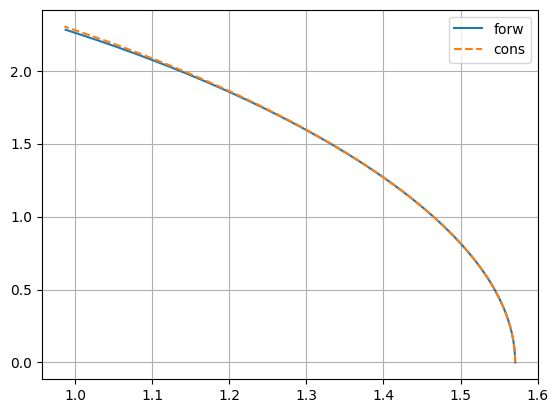

In [ ]:
pendulum = PendulumSystem(
    g=9.81,
    l=2.0, 
    m=1.0,
    damping=0.1,
    max_control=2.0,
)

init_state = np.array([np.pi/2, 0])
dt = 0.0001
N = 5000
poses_cons = [init_state]
poses_forw = [init_state]
for i in range(N):
    poses_cons.append(pendulum.step(poses_cons[-1], 1, -dt))
    poses_forw.append(pendulum.step(poses_forw[ 0], 1, -i*dt))

poses_cons = np.array(poses_cons)
poses_forw = np.array(poses_forw)


plt.plot(poses_forw[:, 0], poses_forw[:, 1], label='forw')
plt.plot(poses_cons[:, 0], poses_cons[:, 1], label='cons', linestyle='--')
plt.legend()
plt.grid()
